# Grafos aleatorios :)
dudas y reclamos a javier.vera@pucv.cl

## Un modelo de grafo aleatorio

Definamos el famoso modelo $G(N,p)$. Supongamos que inicialmente tenemos $N$ nodos. La regla que define $G$ es **simple:** cada par de nodos se une (a través de una arista) con probabilidad $p$. Sabemos que el grado medio $\langle k \rangle$ sigue una relación esencial:

$$
\langle k \rangle = p(N-1)
$$

Denotemos por $N_G$ el tamaño de la componente conexa más grande de $G$. Tenemos **dos casos extremos!**

- Para $p=0$, $\langle k \rangle = 1$. Es decir, todos los nodos están desconectados. Entonces, $N_G=1$ y $N_G/N \longrightarrow 0$ para $N$ grande. 
- Para $p=1$, $\langle k \rangle = N-1$. Es decir, $G$ es una grafo completo. Entonces, $N_G=N$ y $N_G/N = 1$.

A parecer, la **pregunta fundamental** es entonces: ¿Qué ocurre con **$N_G$ para $0 < p < 1$?**

En un famoso [paper](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model), se propone que la condición para que aparezca una **componente gigante** es 

$$
\langle k \rangle = 1
$$

Miremos **qué ocurre en términos numéricos :)**

## (1) Modelo $G(N,p)$

In [1]:
!pip install pydot

In [2]:
import networkx as nx

In [3]:
## mini ejemplo
import numpy as np

N=100
P=[1/1000,1/100,2/100,2*np.log(N)/N]

In [4]:
P

[0.001, 0.01, 0.02, 0.09210340371976183]

In [9]:
## grafiquemos 

import matplotlib.pyplot as plt

def plotG(G):
    
    fig, ax = plt.subplots(dpi=800)
    
    pos = nx.nx_pydot.graphviz_layout(G)#nx.kamada_kawai_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size = 10, node_color='salmon',node_shape='o',alpha=0.95, linewidths=0.1) 
    nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.2,edge_color='k')
    plt.axis('off')
    plt.show()

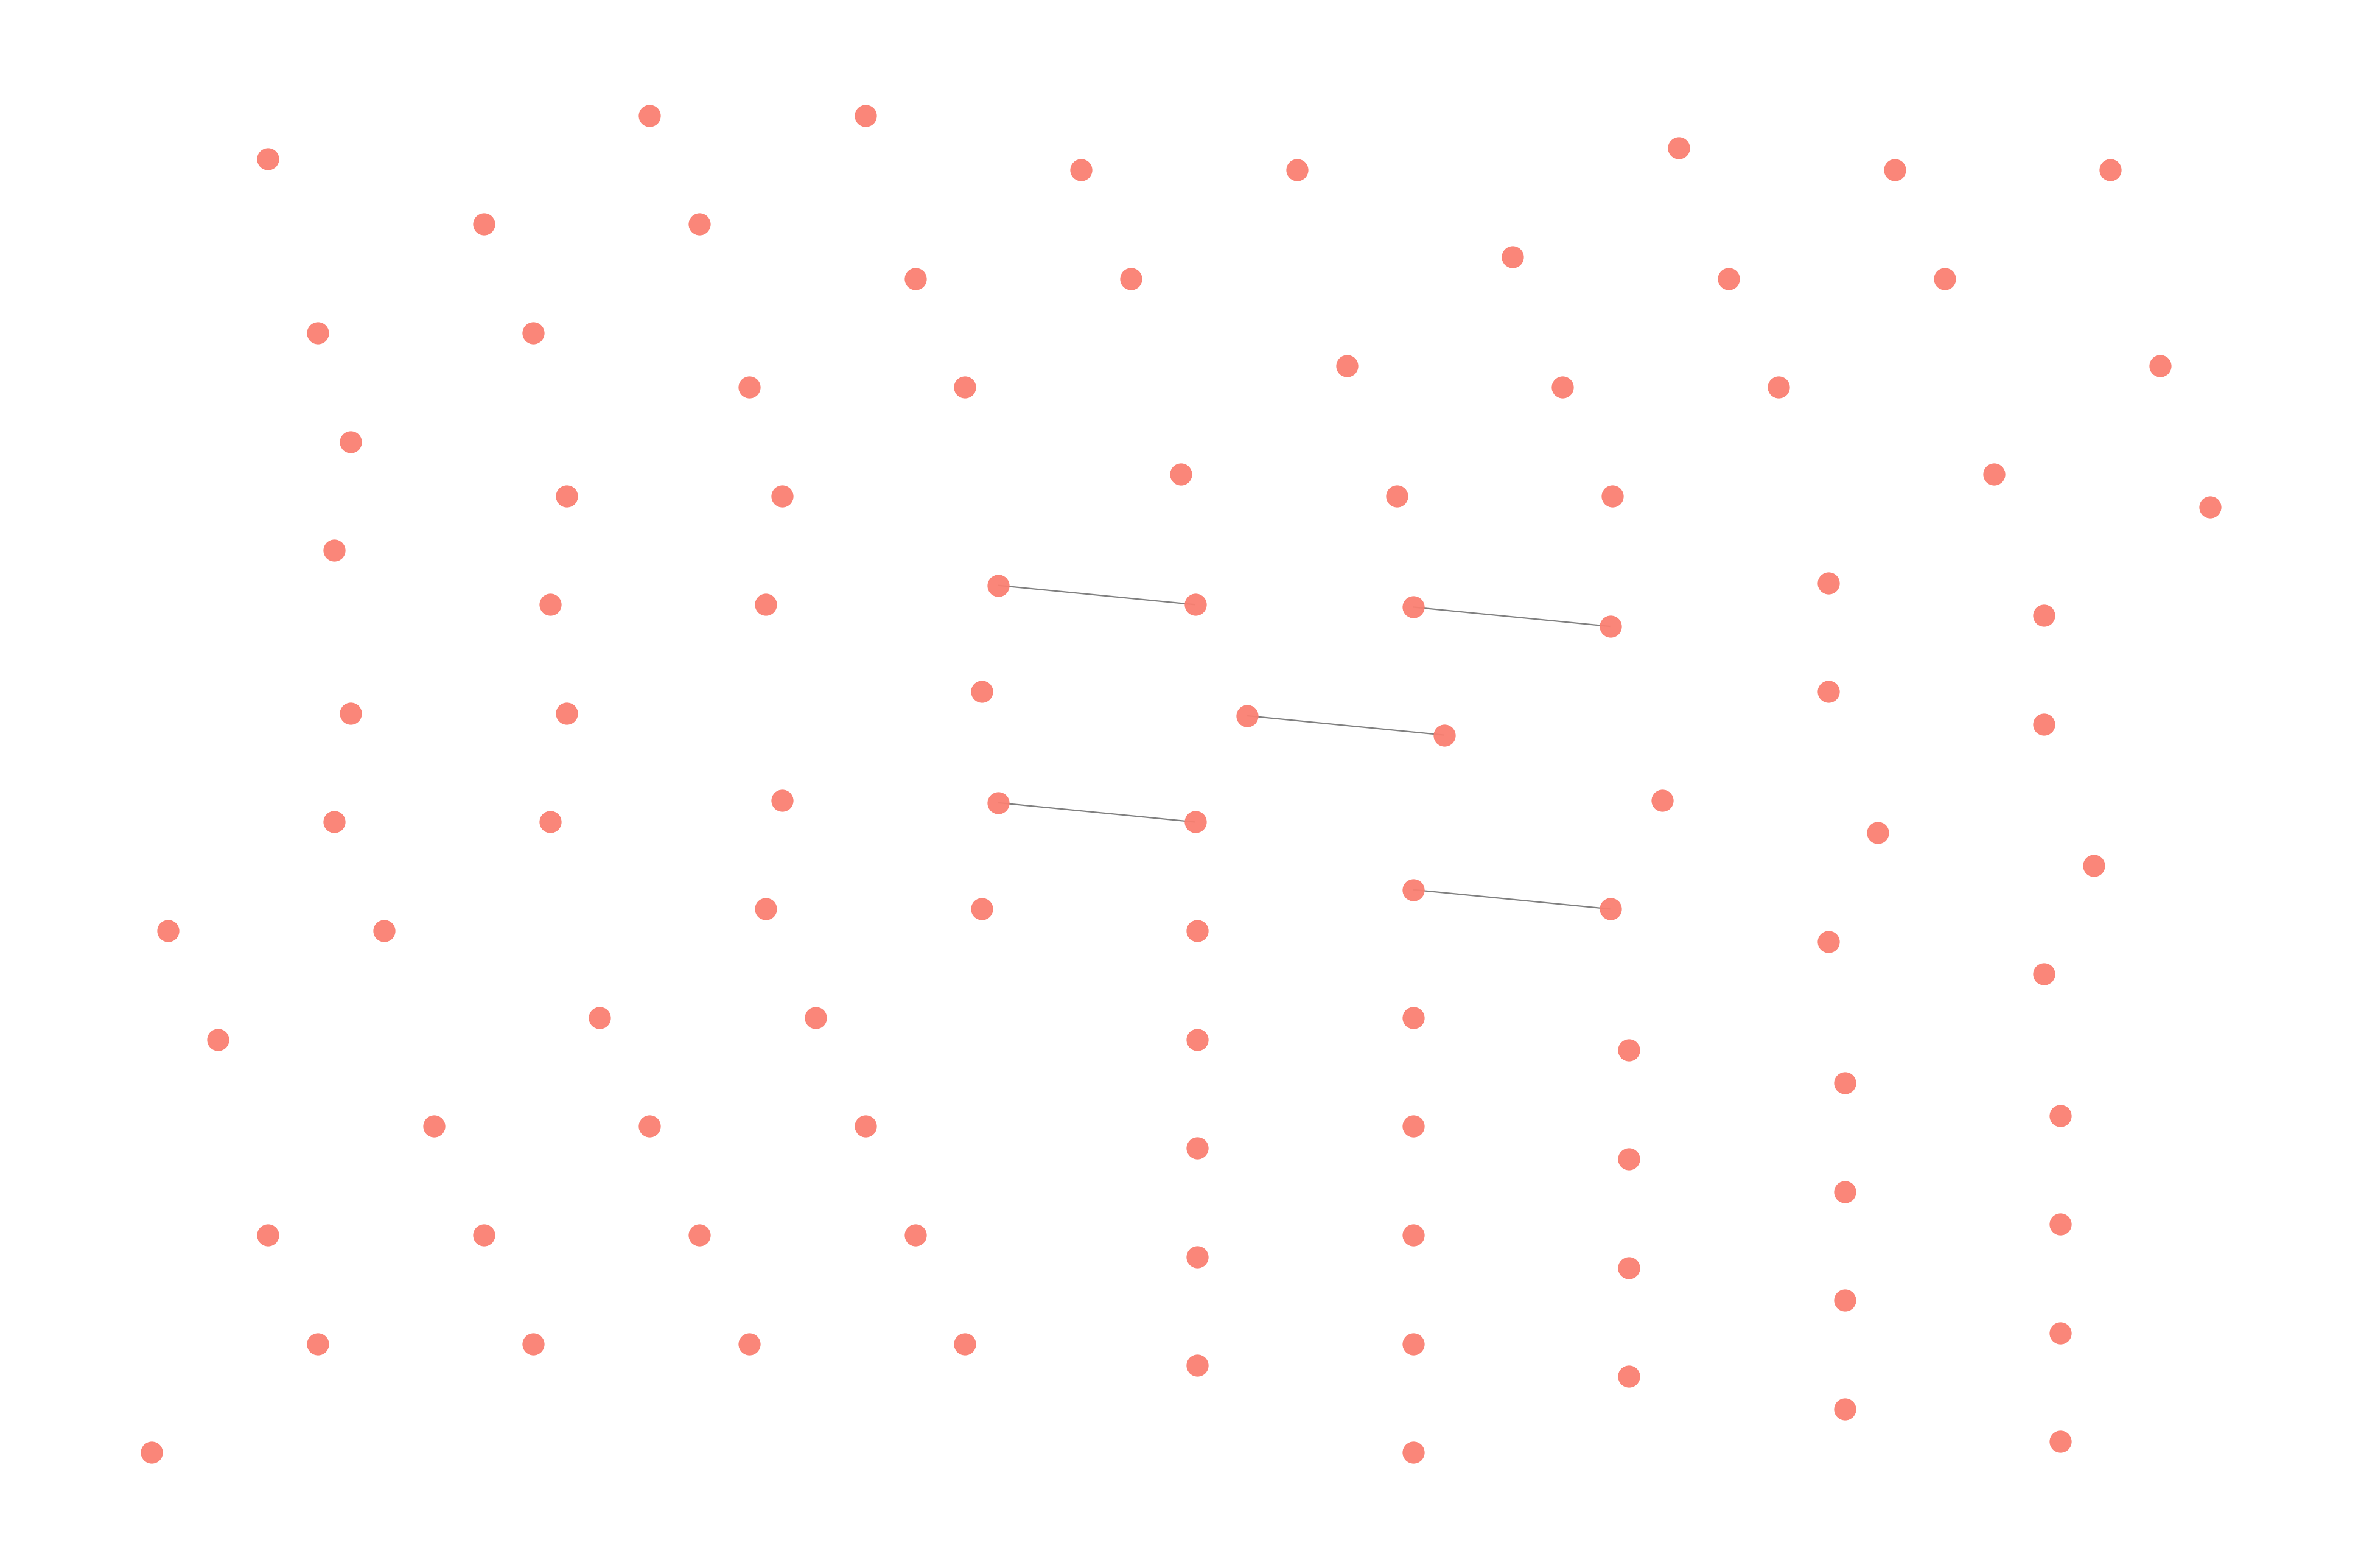

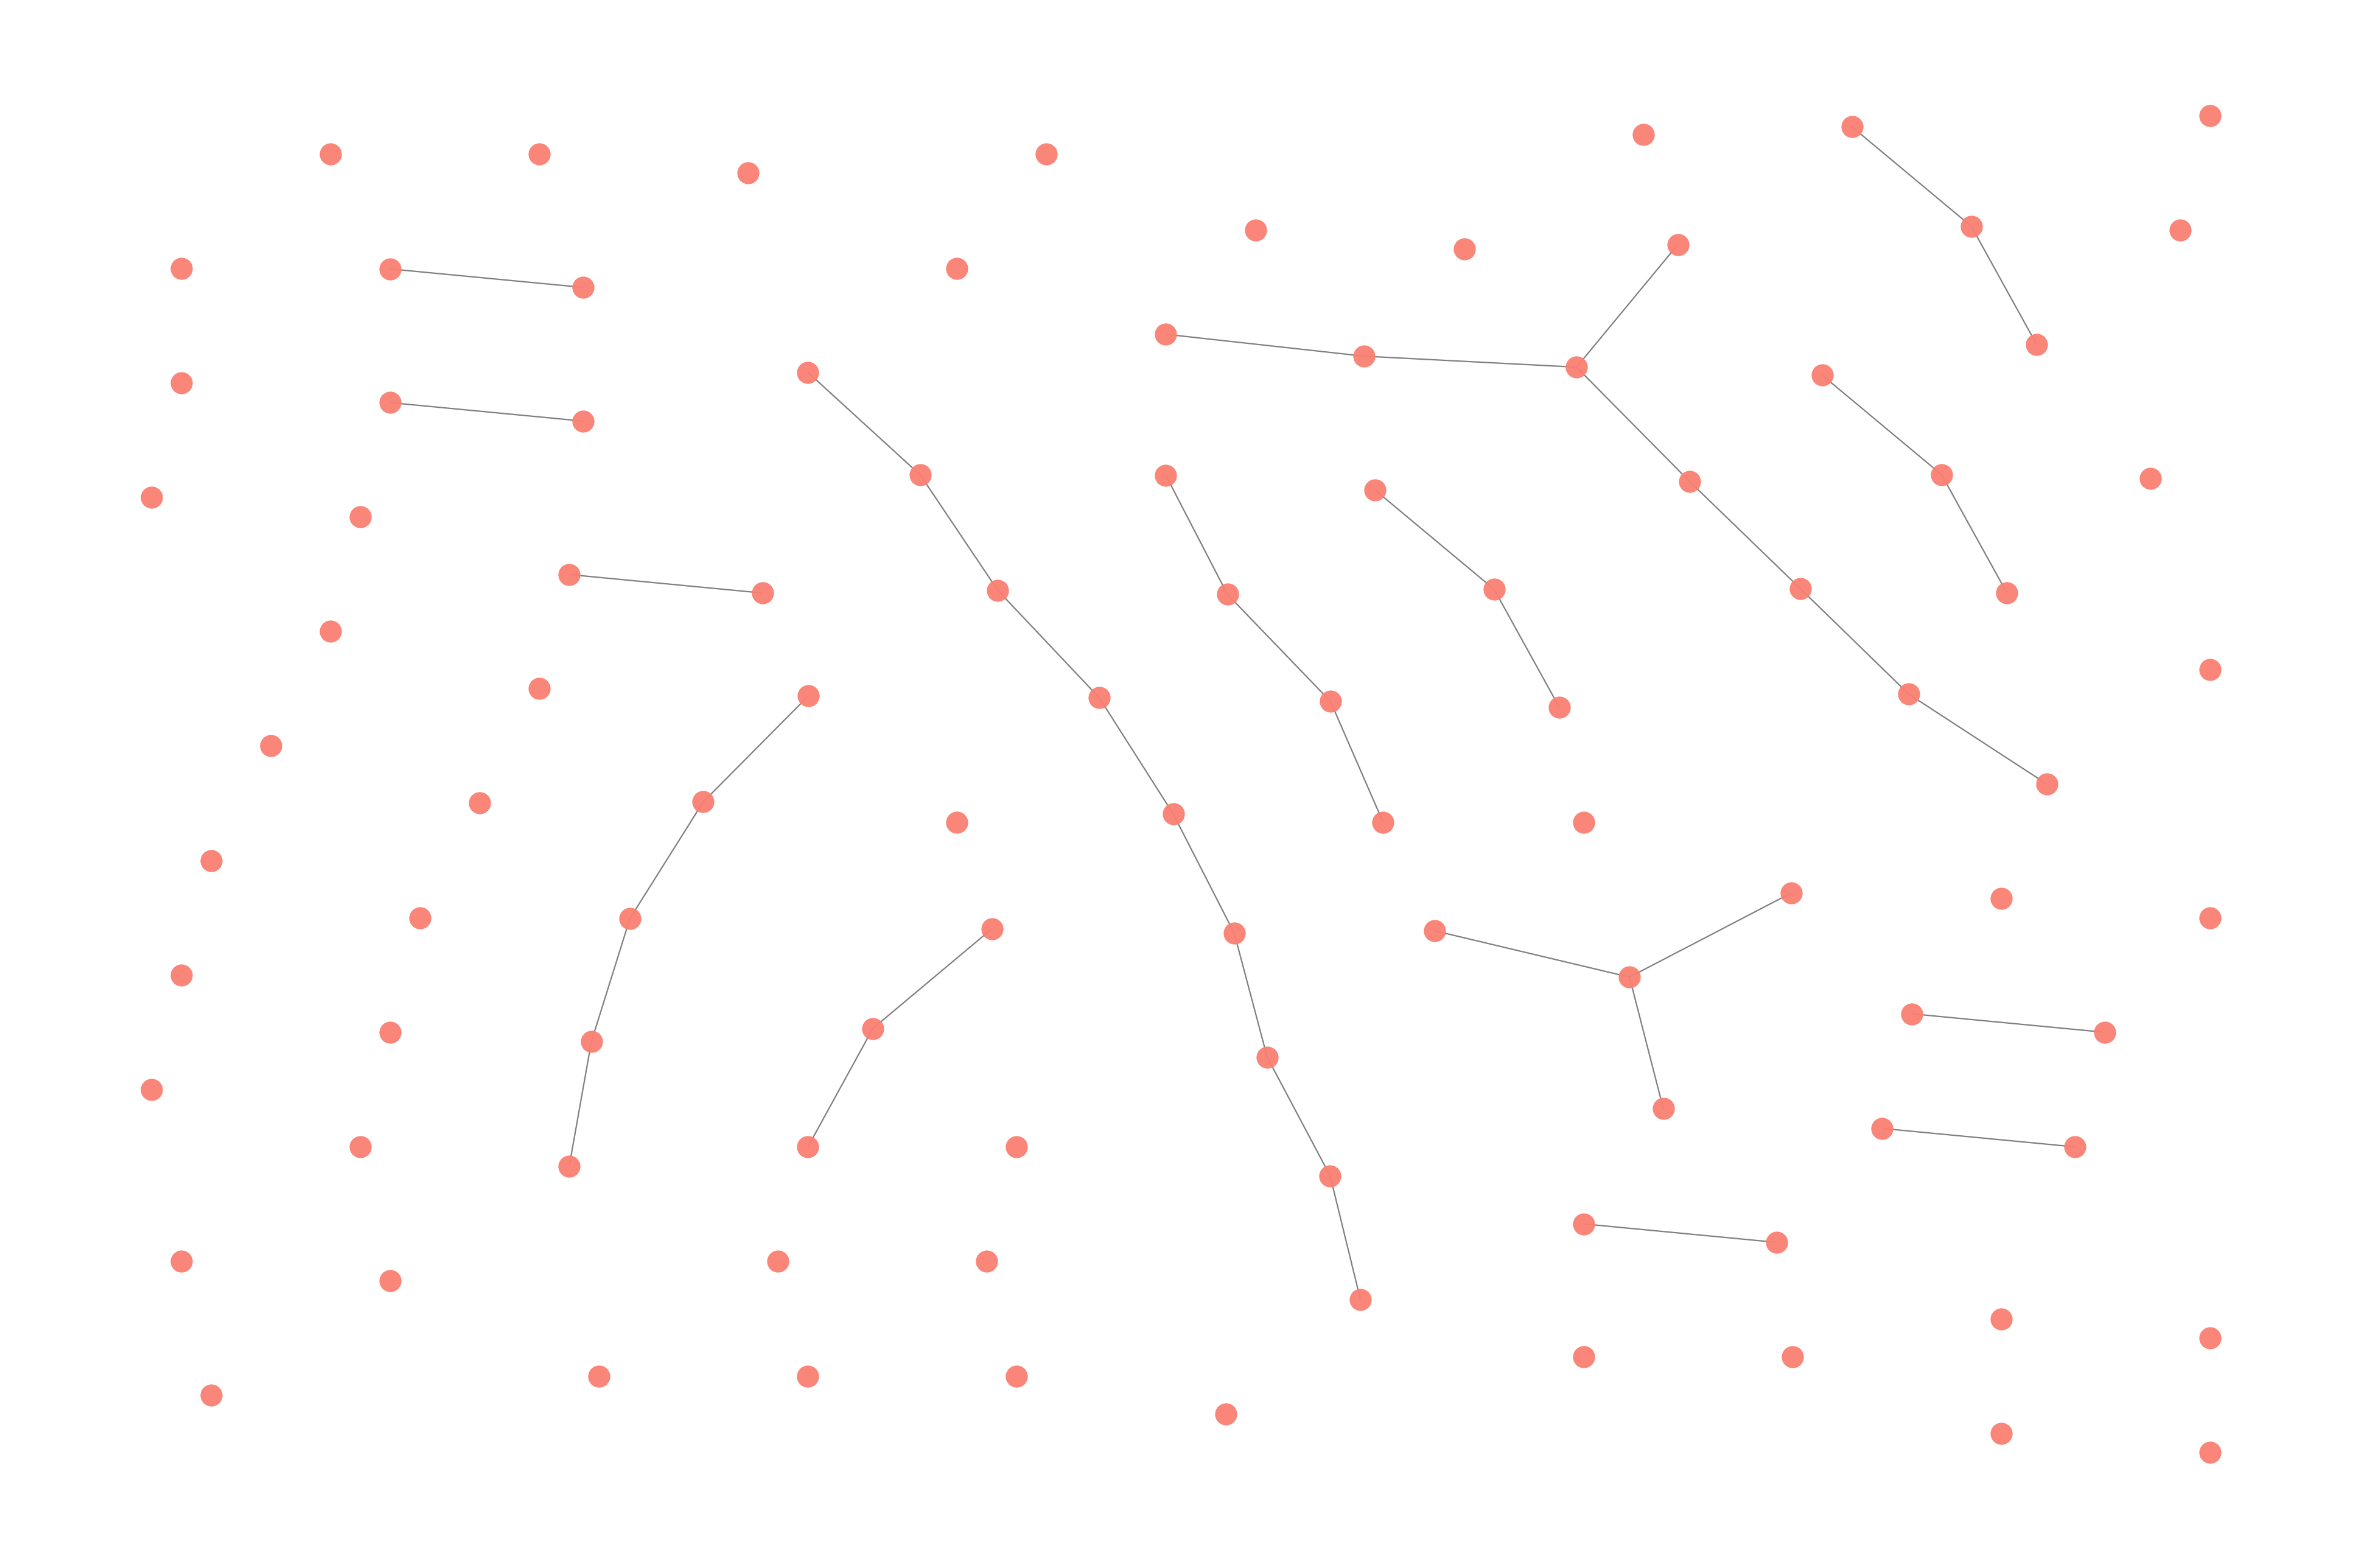

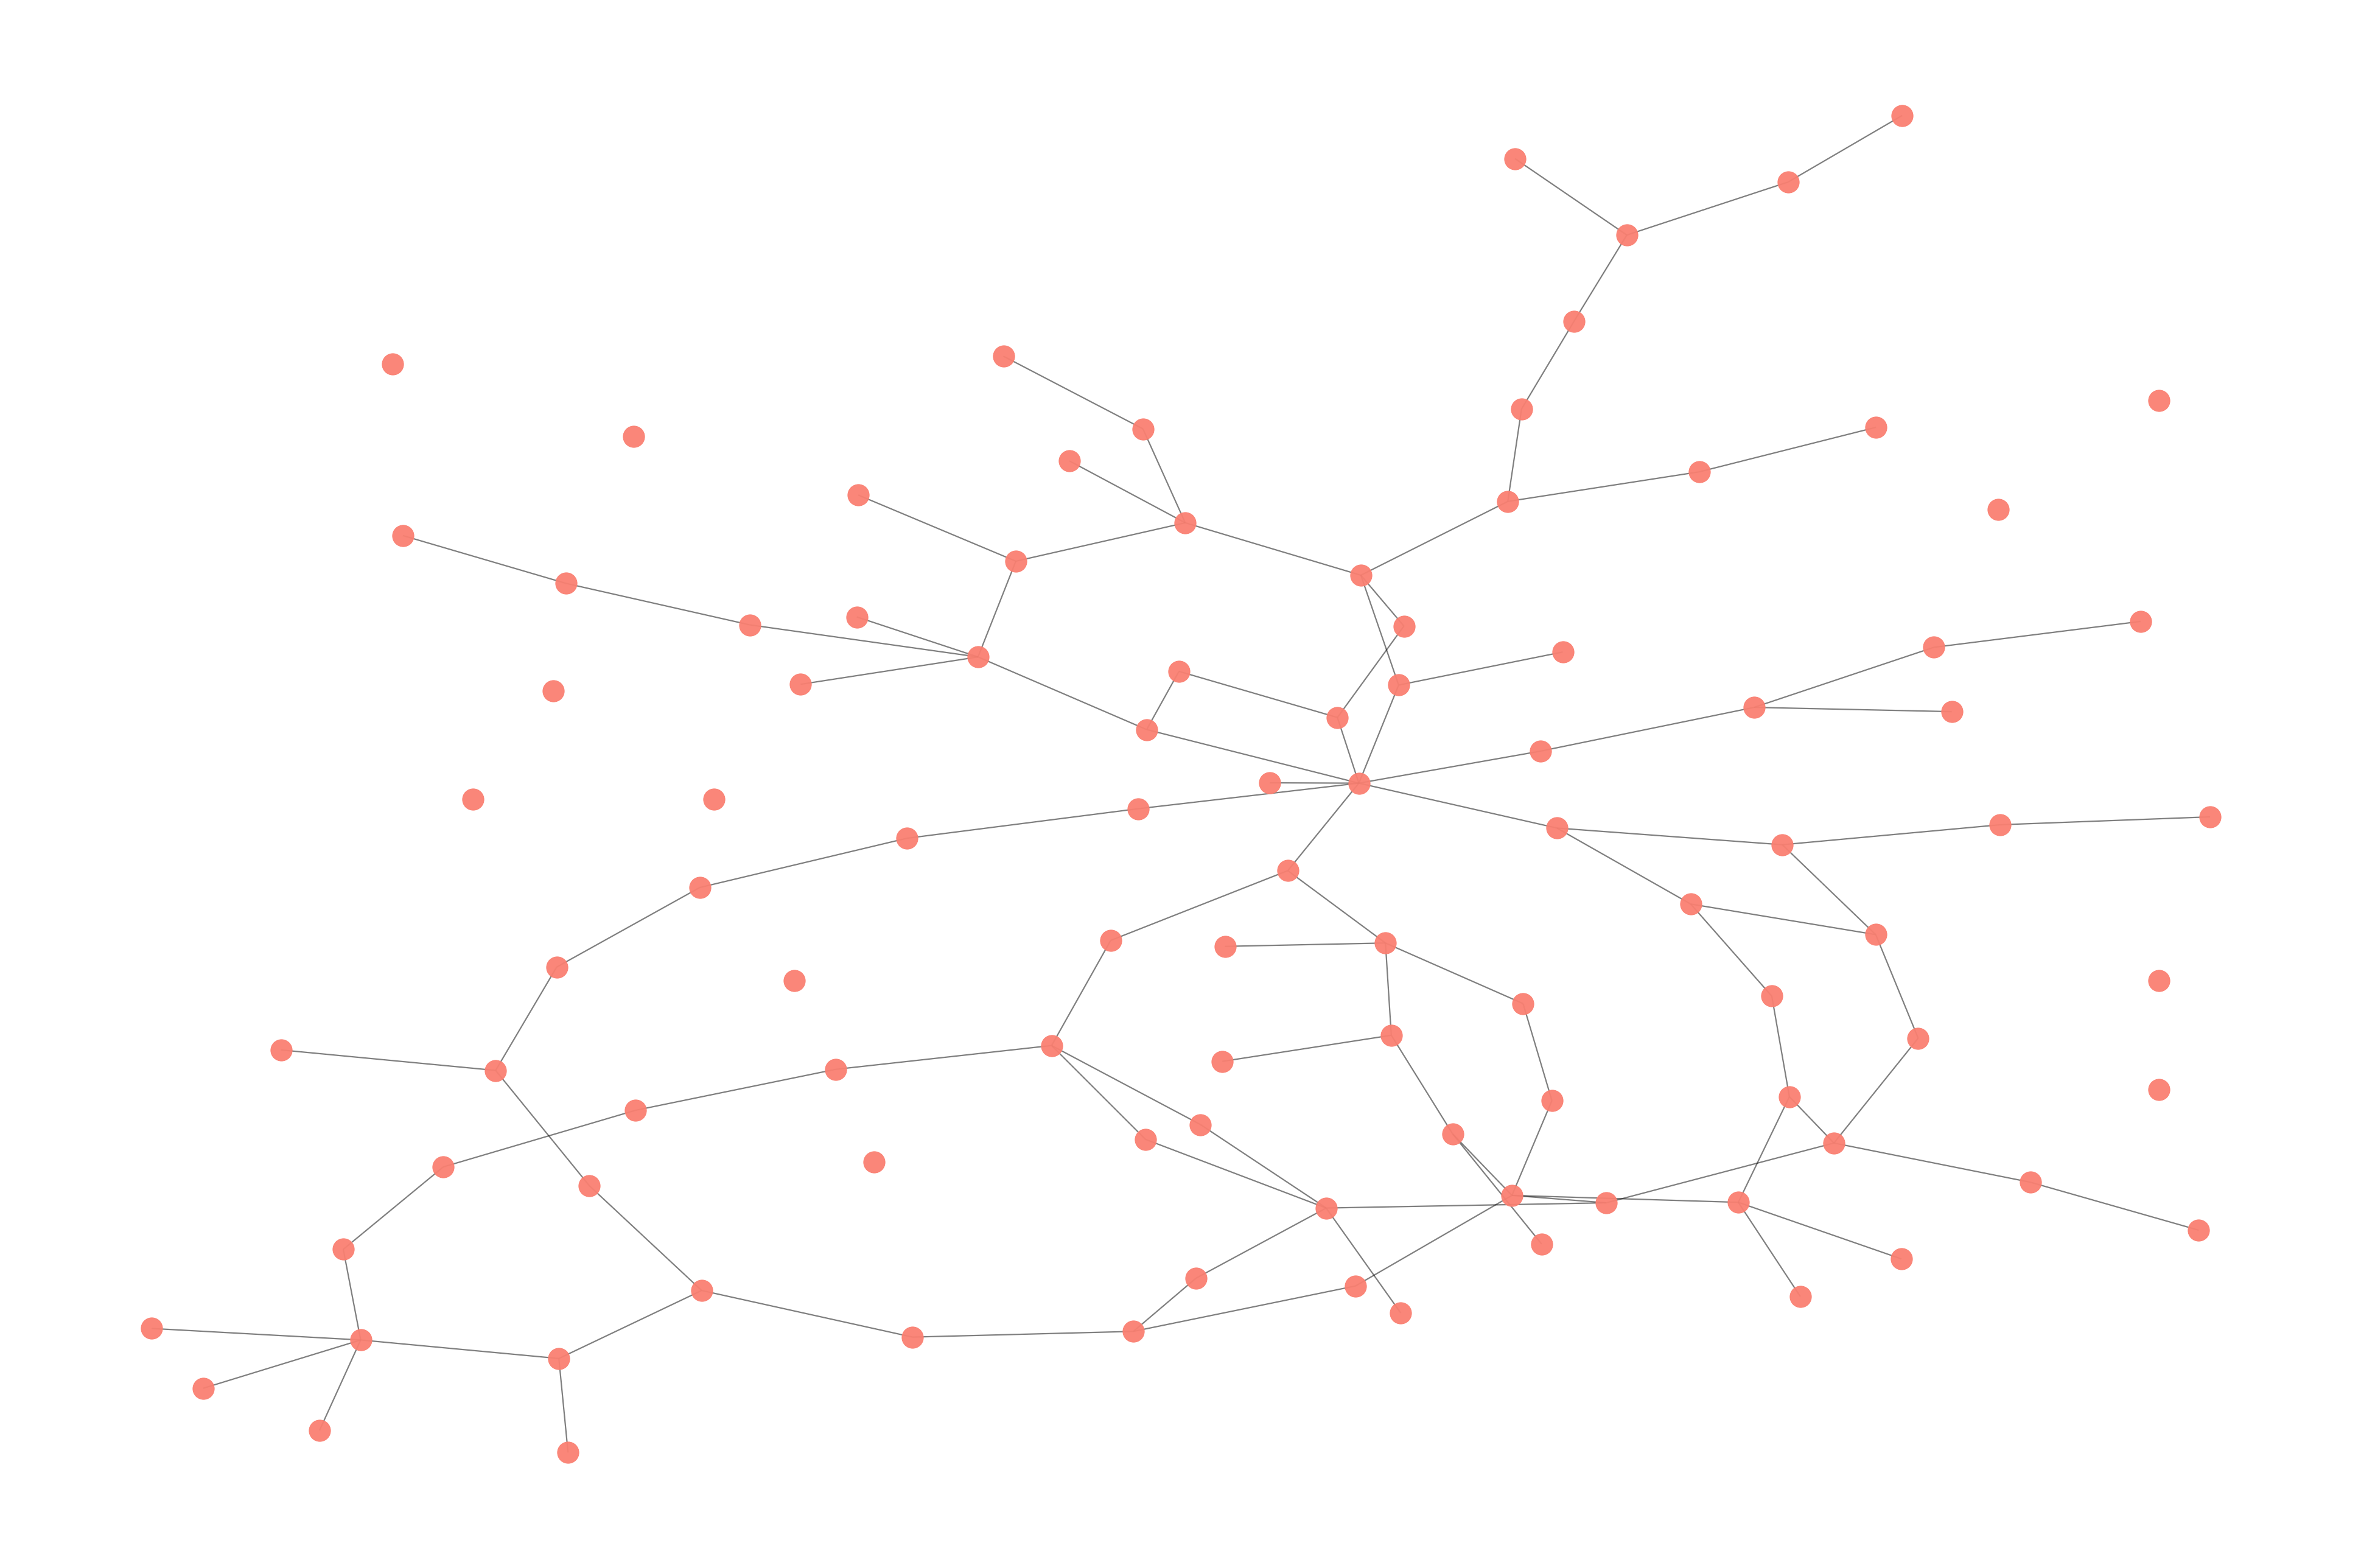

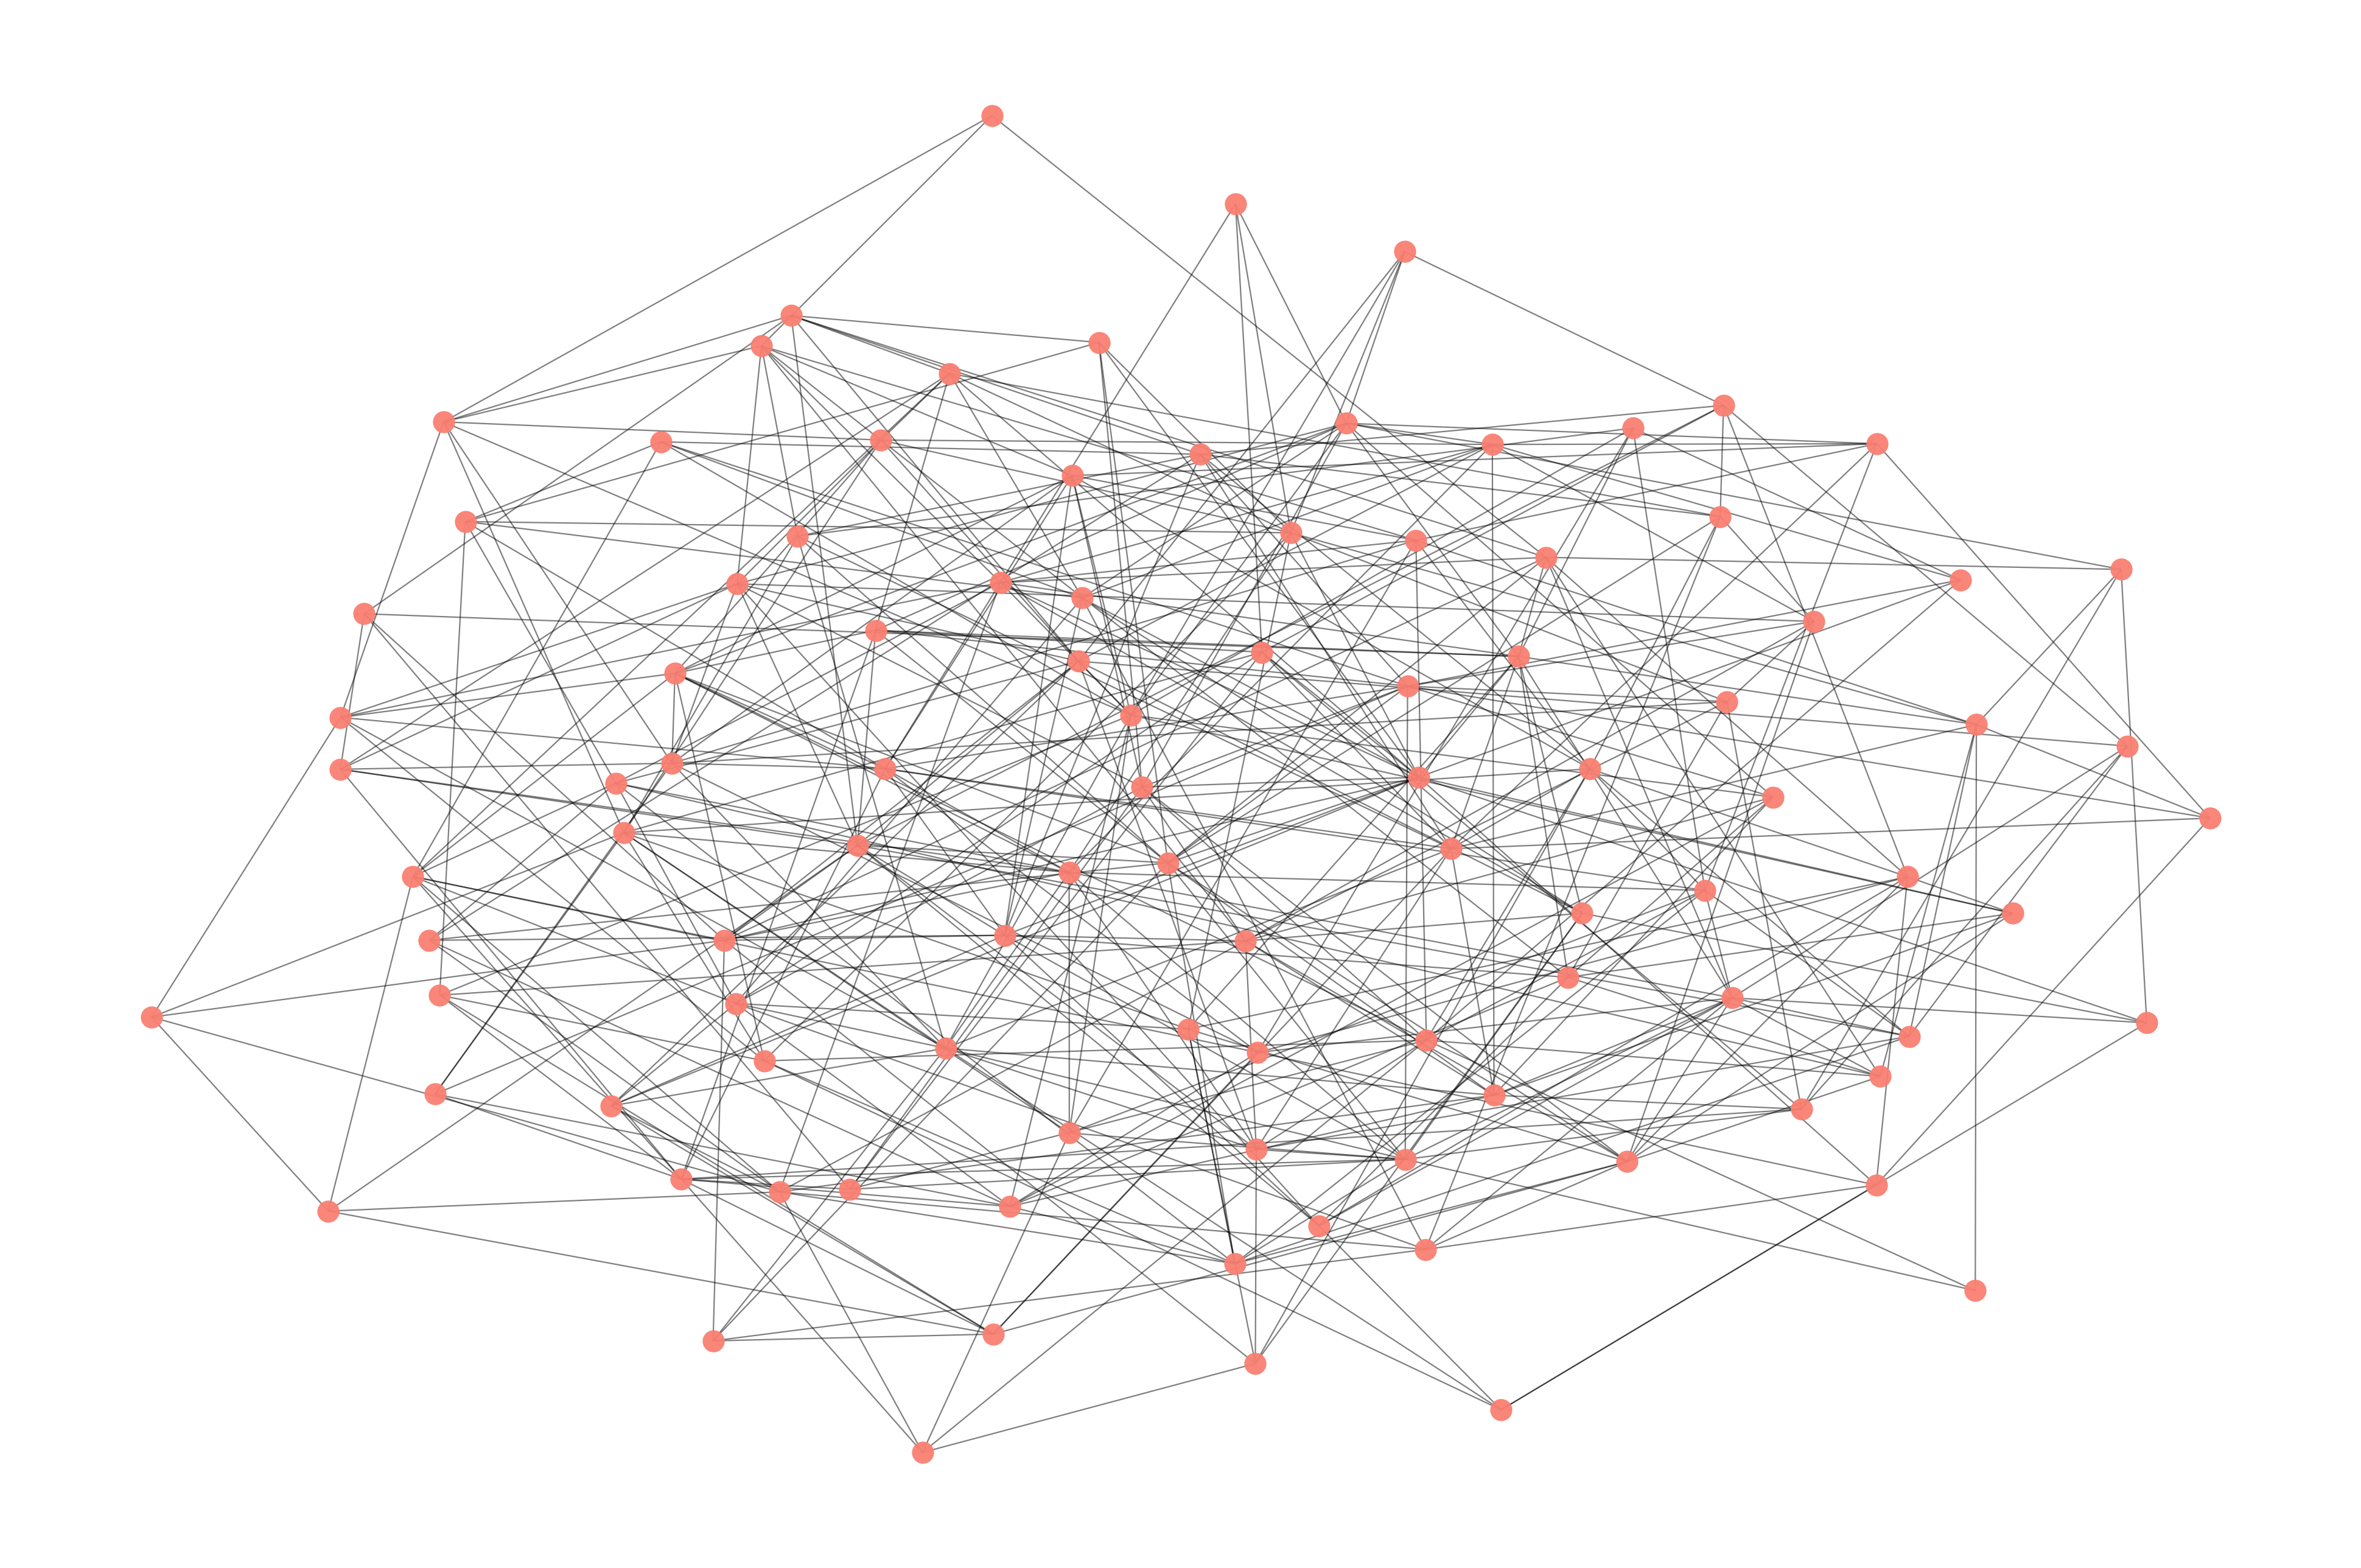

In [10]:
for p in P:
    G=nx.erdos_renyi_graph(N,p)
    plotG(G)

## (2) Exploremos (más o menos) exhaustivamente el **parámetro $p$**

**Transición 1:** $np<1$

In [ ]:
epsilon=1/100

largest_sizes=[]
N=50
p=1/50-epsilon

for i in range(1000):
    G=nx.erdos_renyi_graph(N,p)
    largest_sizes.append(len(max(nx.connected_components(G), key=len))/N)
    
print("Esperamos que el tamaño de la componente conexa más grande sea de orden: ",np.log(N))
print("El tamaño promedio real de la componente conexa más grande es: ",np.mean(largest_sizes))

Esperamos que el tamaño de la componente conexa más grande sea de orden:  3.912023005428146
El tamaño promedio real de la componente conexa más grande es:  0.09792000000000002


**Transición 2:** $np=1$

In [ ]:
largest_sizes=[]
N=50
p=1/50

for i in range(1000):
    G=nx.erdos_renyi_graph(N,p)
    largest_sizes.append(len(max(nx.connected_components(G), key=len))/N)
    
print("Esperamos que el tamaño de la componente conexa más grande sea de orden: ",N**(2/3))
print("El tamaño promedio real de la componente conexa más grande es: ",np.mean(largest_sizes))

Esperamos que el tamaño de la componente conexa más grande sea de orden:  13.572088082974531
El tamaño promedio real de la componente conexa más grande es:  0.25784


**Transición 3:** $np>1$

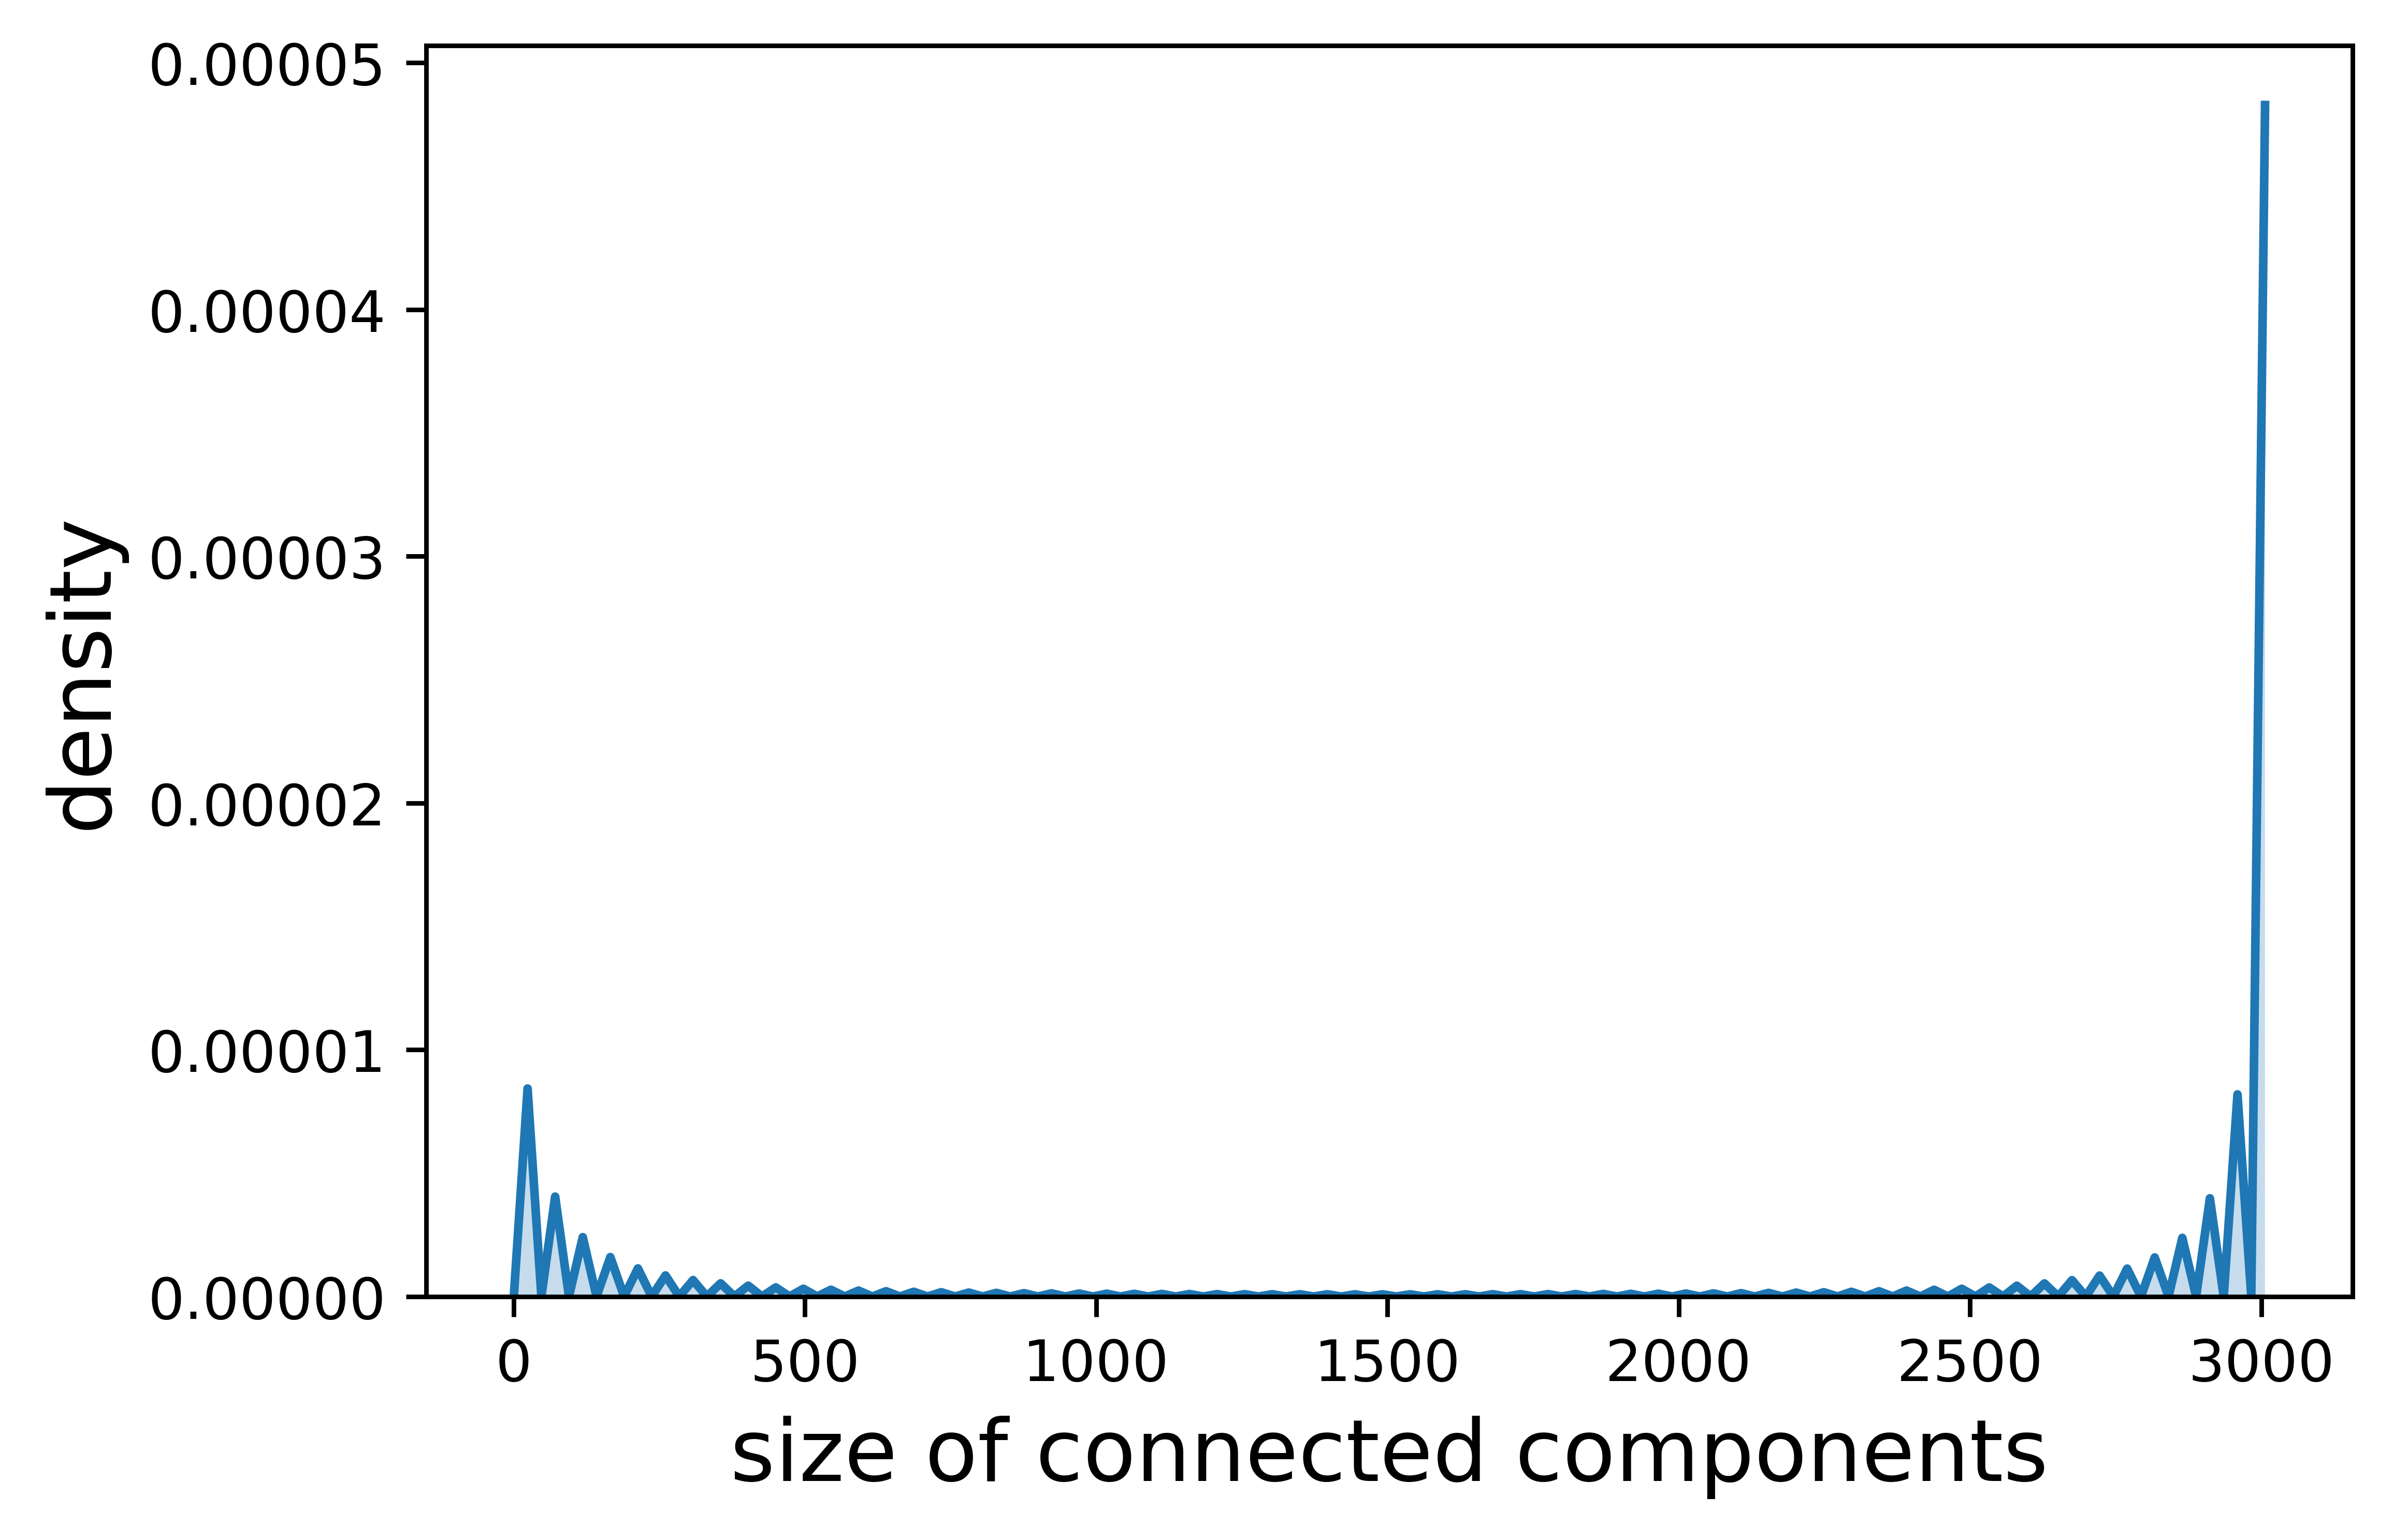

In [ ]:
import seaborn as sns

largest_sizes=[]
epsilon=1/10000
N=5000
p=1/5000+epsilon
G=nx.erdos_renyi_graph(N,p)

fig, ax = plt.subplots(dpi=800)
sns.kdeplot([len(C) for C in sorted(nx.connected_components(G), key=len)],bw=.2,shade=True)

plt.ylabel(r'density',fontsize=15)
plt.xlabel(r'size of connected components',fontsize=15)
plt.show()

## (3) Camino mínimo promedio vs probability

In [ ]:
P = np.linspace(0,1,1000)
caminos = {p:[] for p in P}
N=50
repeticiones = 5
for r in range(repeticiones):
    for p in P:
        G=nx.erdos_renyi_graph(N,p)
        nodes_largest = max(nx.connected_components(G), key=len)
        G = G.subgraph(nodes_largest)
        caminos[p]+=[nx.average_shortest_path_length(G)]

caminos = [np.mean(c) for c in caminos.values()]

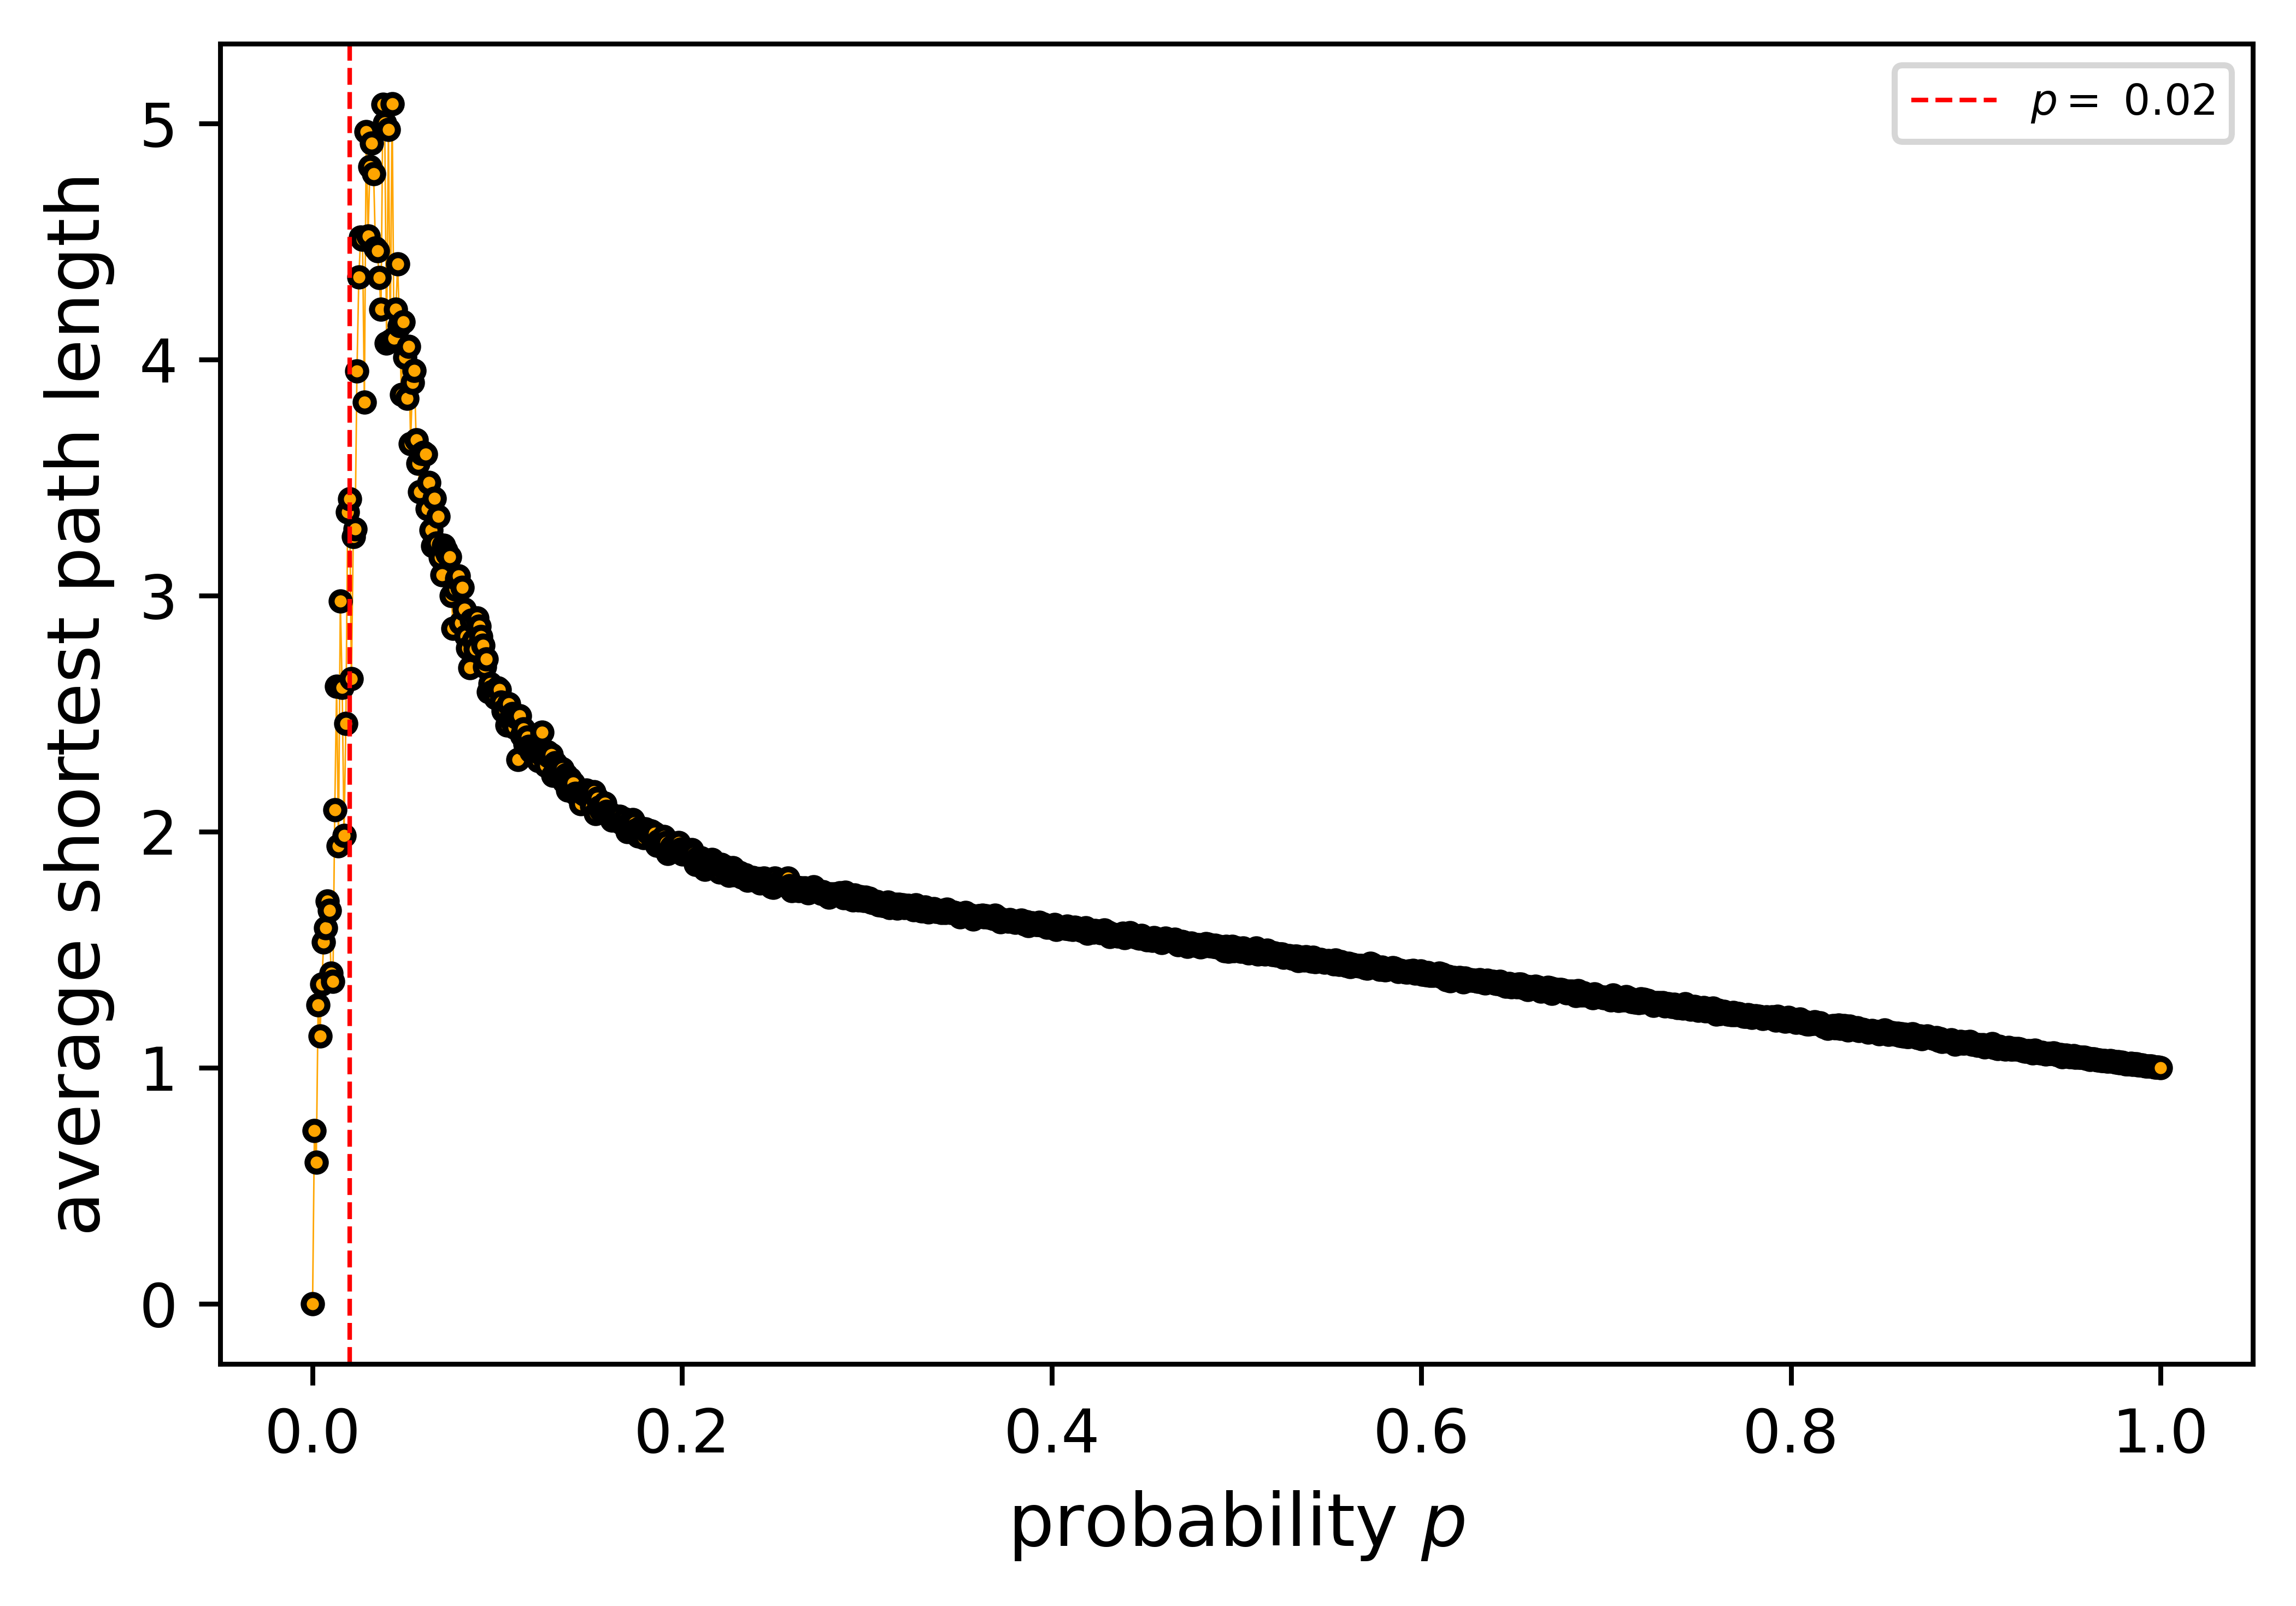

In [ ]:
fig, ax = plt.subplots(dpi=800)

ax.plot(P, caminos, linewidth=0.25, marker='o',color='orange',markersize=3,markeredgecolor='k',markeredgewidth=1,fillstyle='full',clip_on=True)
plt.axvline(1/N, linestyle='--',linewidth=0.75,color='r',label='$p=$ {}'.format(1/N))

plt.legend(loc='best',fontsize=7)
plt.xlabel(r'probability $p$',fontsize=12)
plt.ylabel(r'average shortest path length',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('caminos.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

## (4) Average clustering vs probability

In [ ]:
P = np.linspace(0,1,1000)
clustering = {p:[] for p in P}
N=50
repeticiones = 5
for r in range(repeticiones):
    for p in P:
        G=nx.erdos_renyi_graph(N,p)
        clustering[p]+=[nx.average_clustering(G)]

clustering = [np.mean(c) for c in clustering.values()]

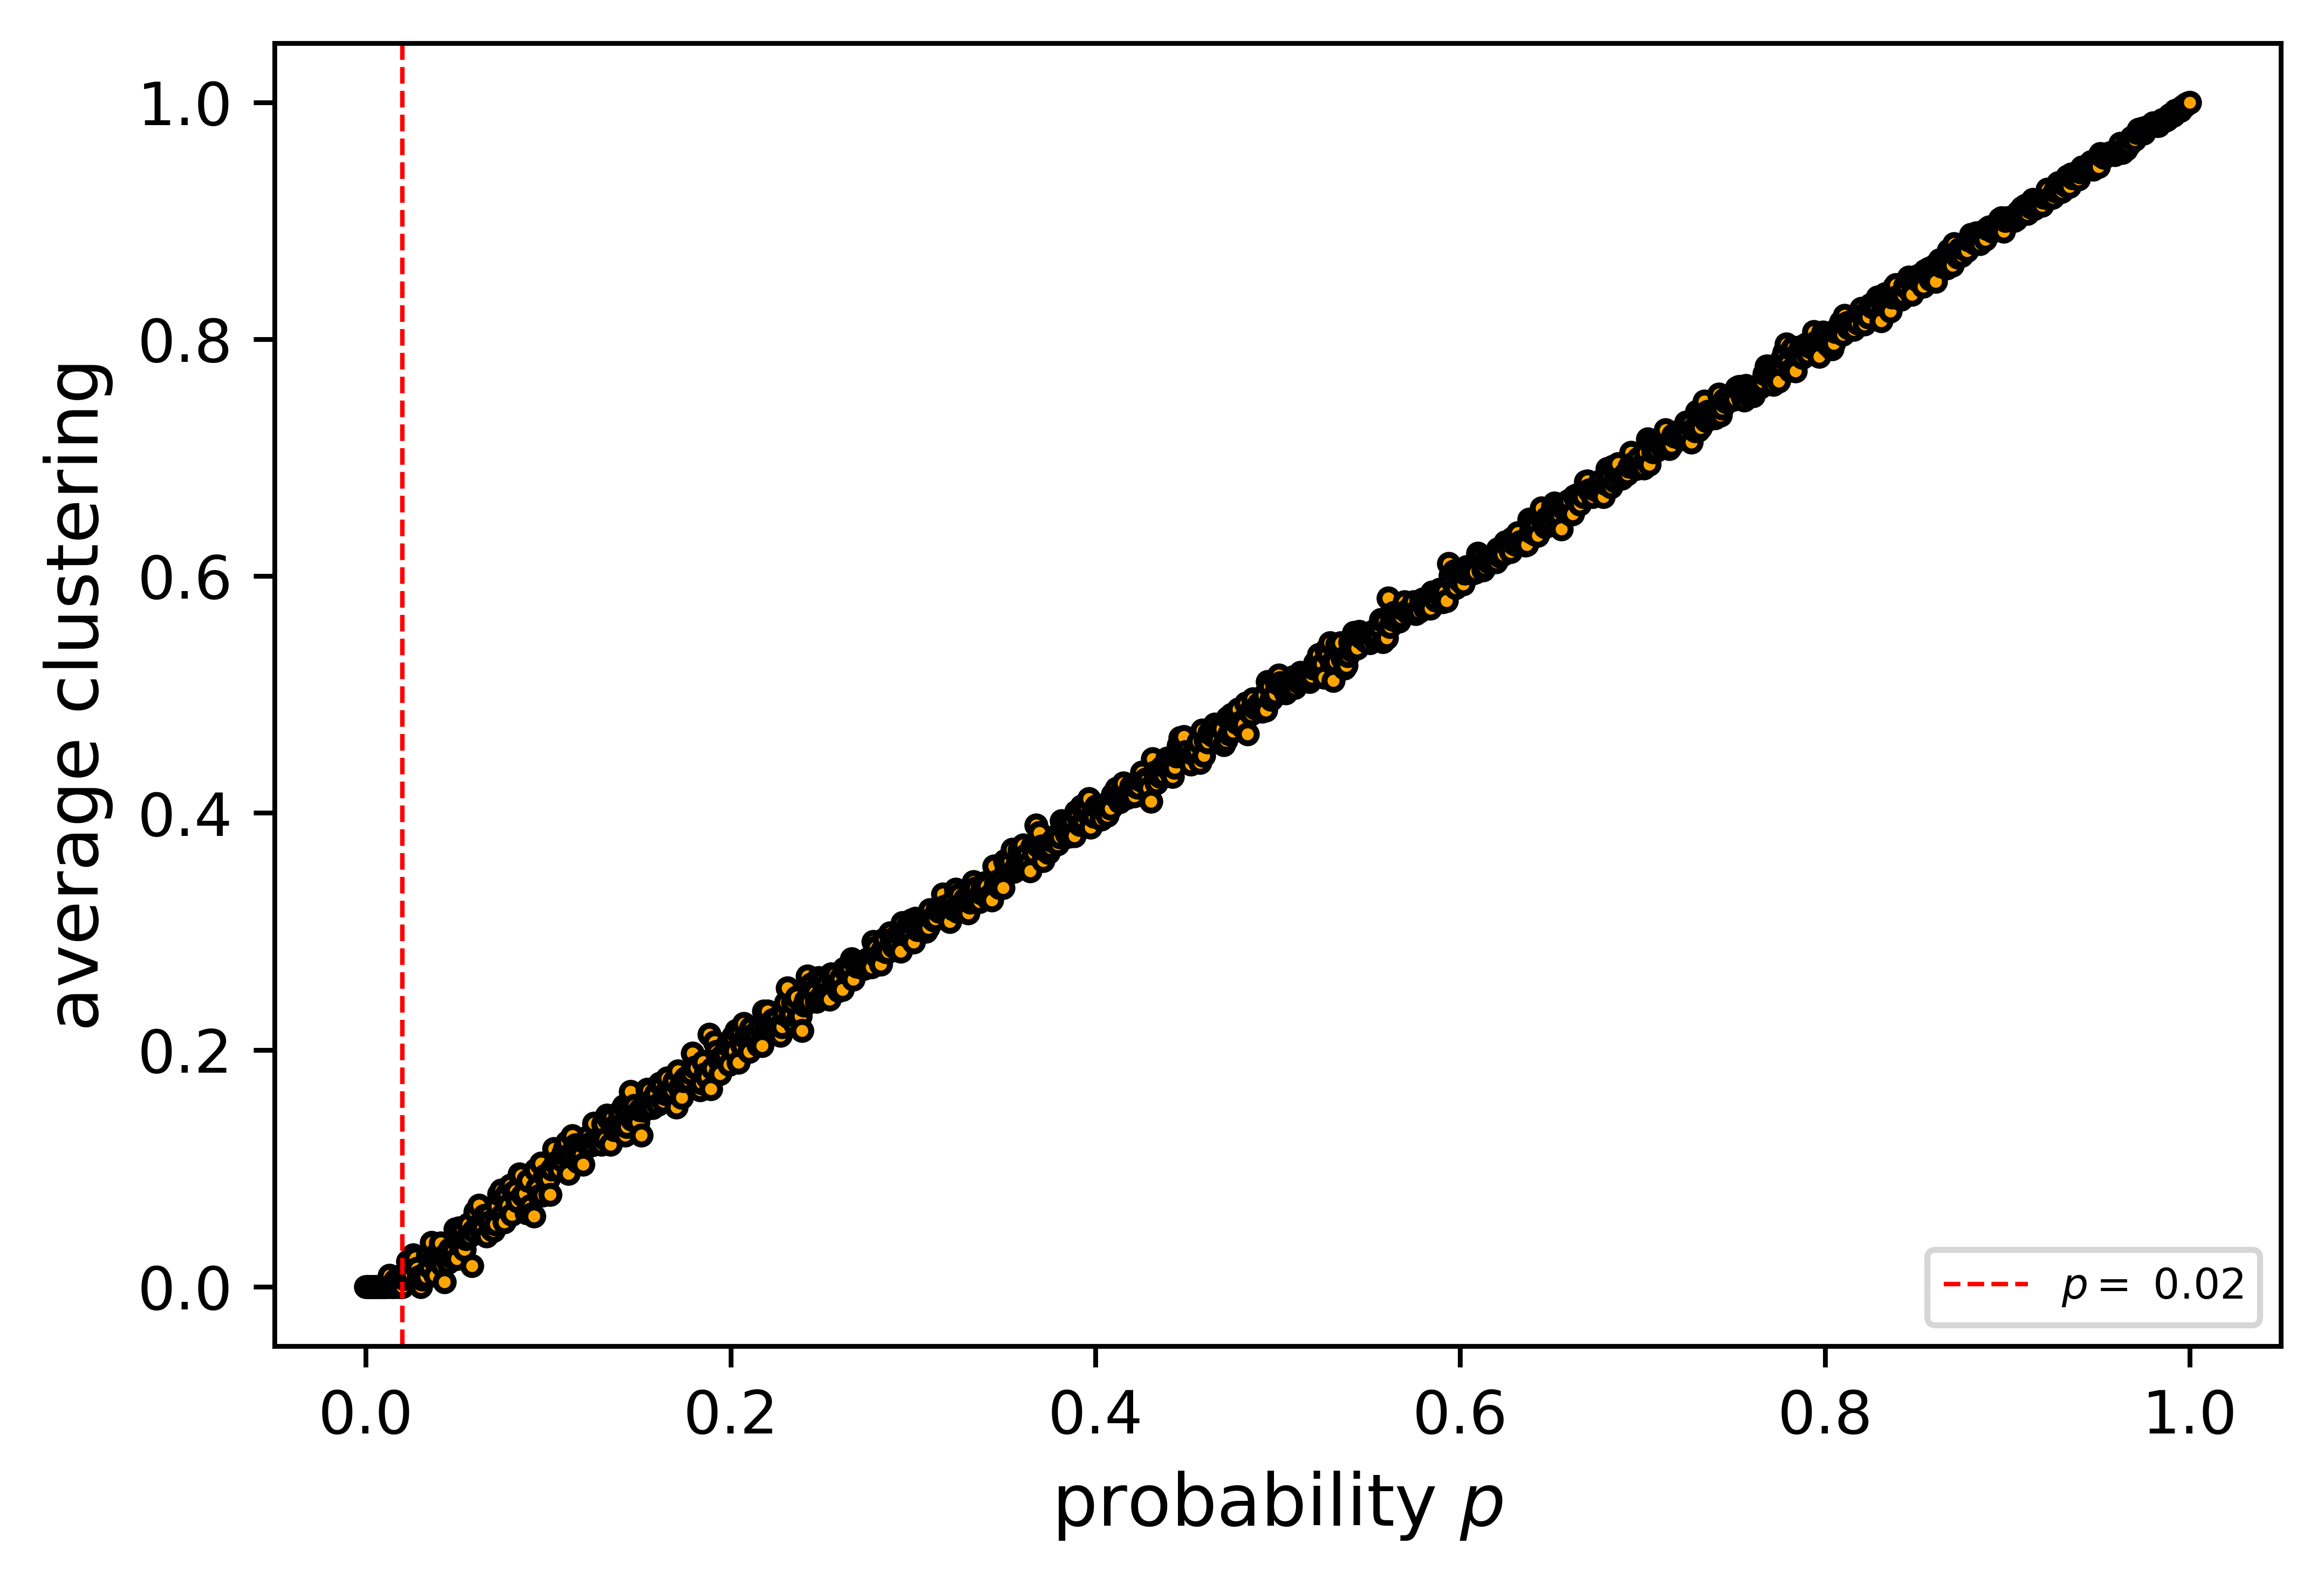

In [ ]:
fig, ax = plt.subplots(dpi=800)

ax.plot(P, clustering, linewidth=0.25, marker='o',color='orange',markersize=3,markeredgecolor='k',markeredgewidth=1,fillstyle='full',clip_on=True)
plt.axvline(1/N, linestyle='--',linewidth=0.75,color='r',label='$p=$ {}'.format(1/N))

plt.legend(loc='best',fontsize=7)
plt.xlabel(r'probability $p$',fontsize=12)
plt.ylabel(r'average clustering',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('clustering.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

## (5) Average degree vs probability

In [ ]:
P = np.linspace(0,1,1000)
degree = {p:[] for p in P}
N=50
repeticiones = 5
for r in range(repeticiones):
    for p in P:
        G=nx.erdos_renyi_graph(N,p)
        degree[p]+=[np.mean(list(dict(G.degree).values()))]

degree = [np.mean(c) for c in degree.values()]

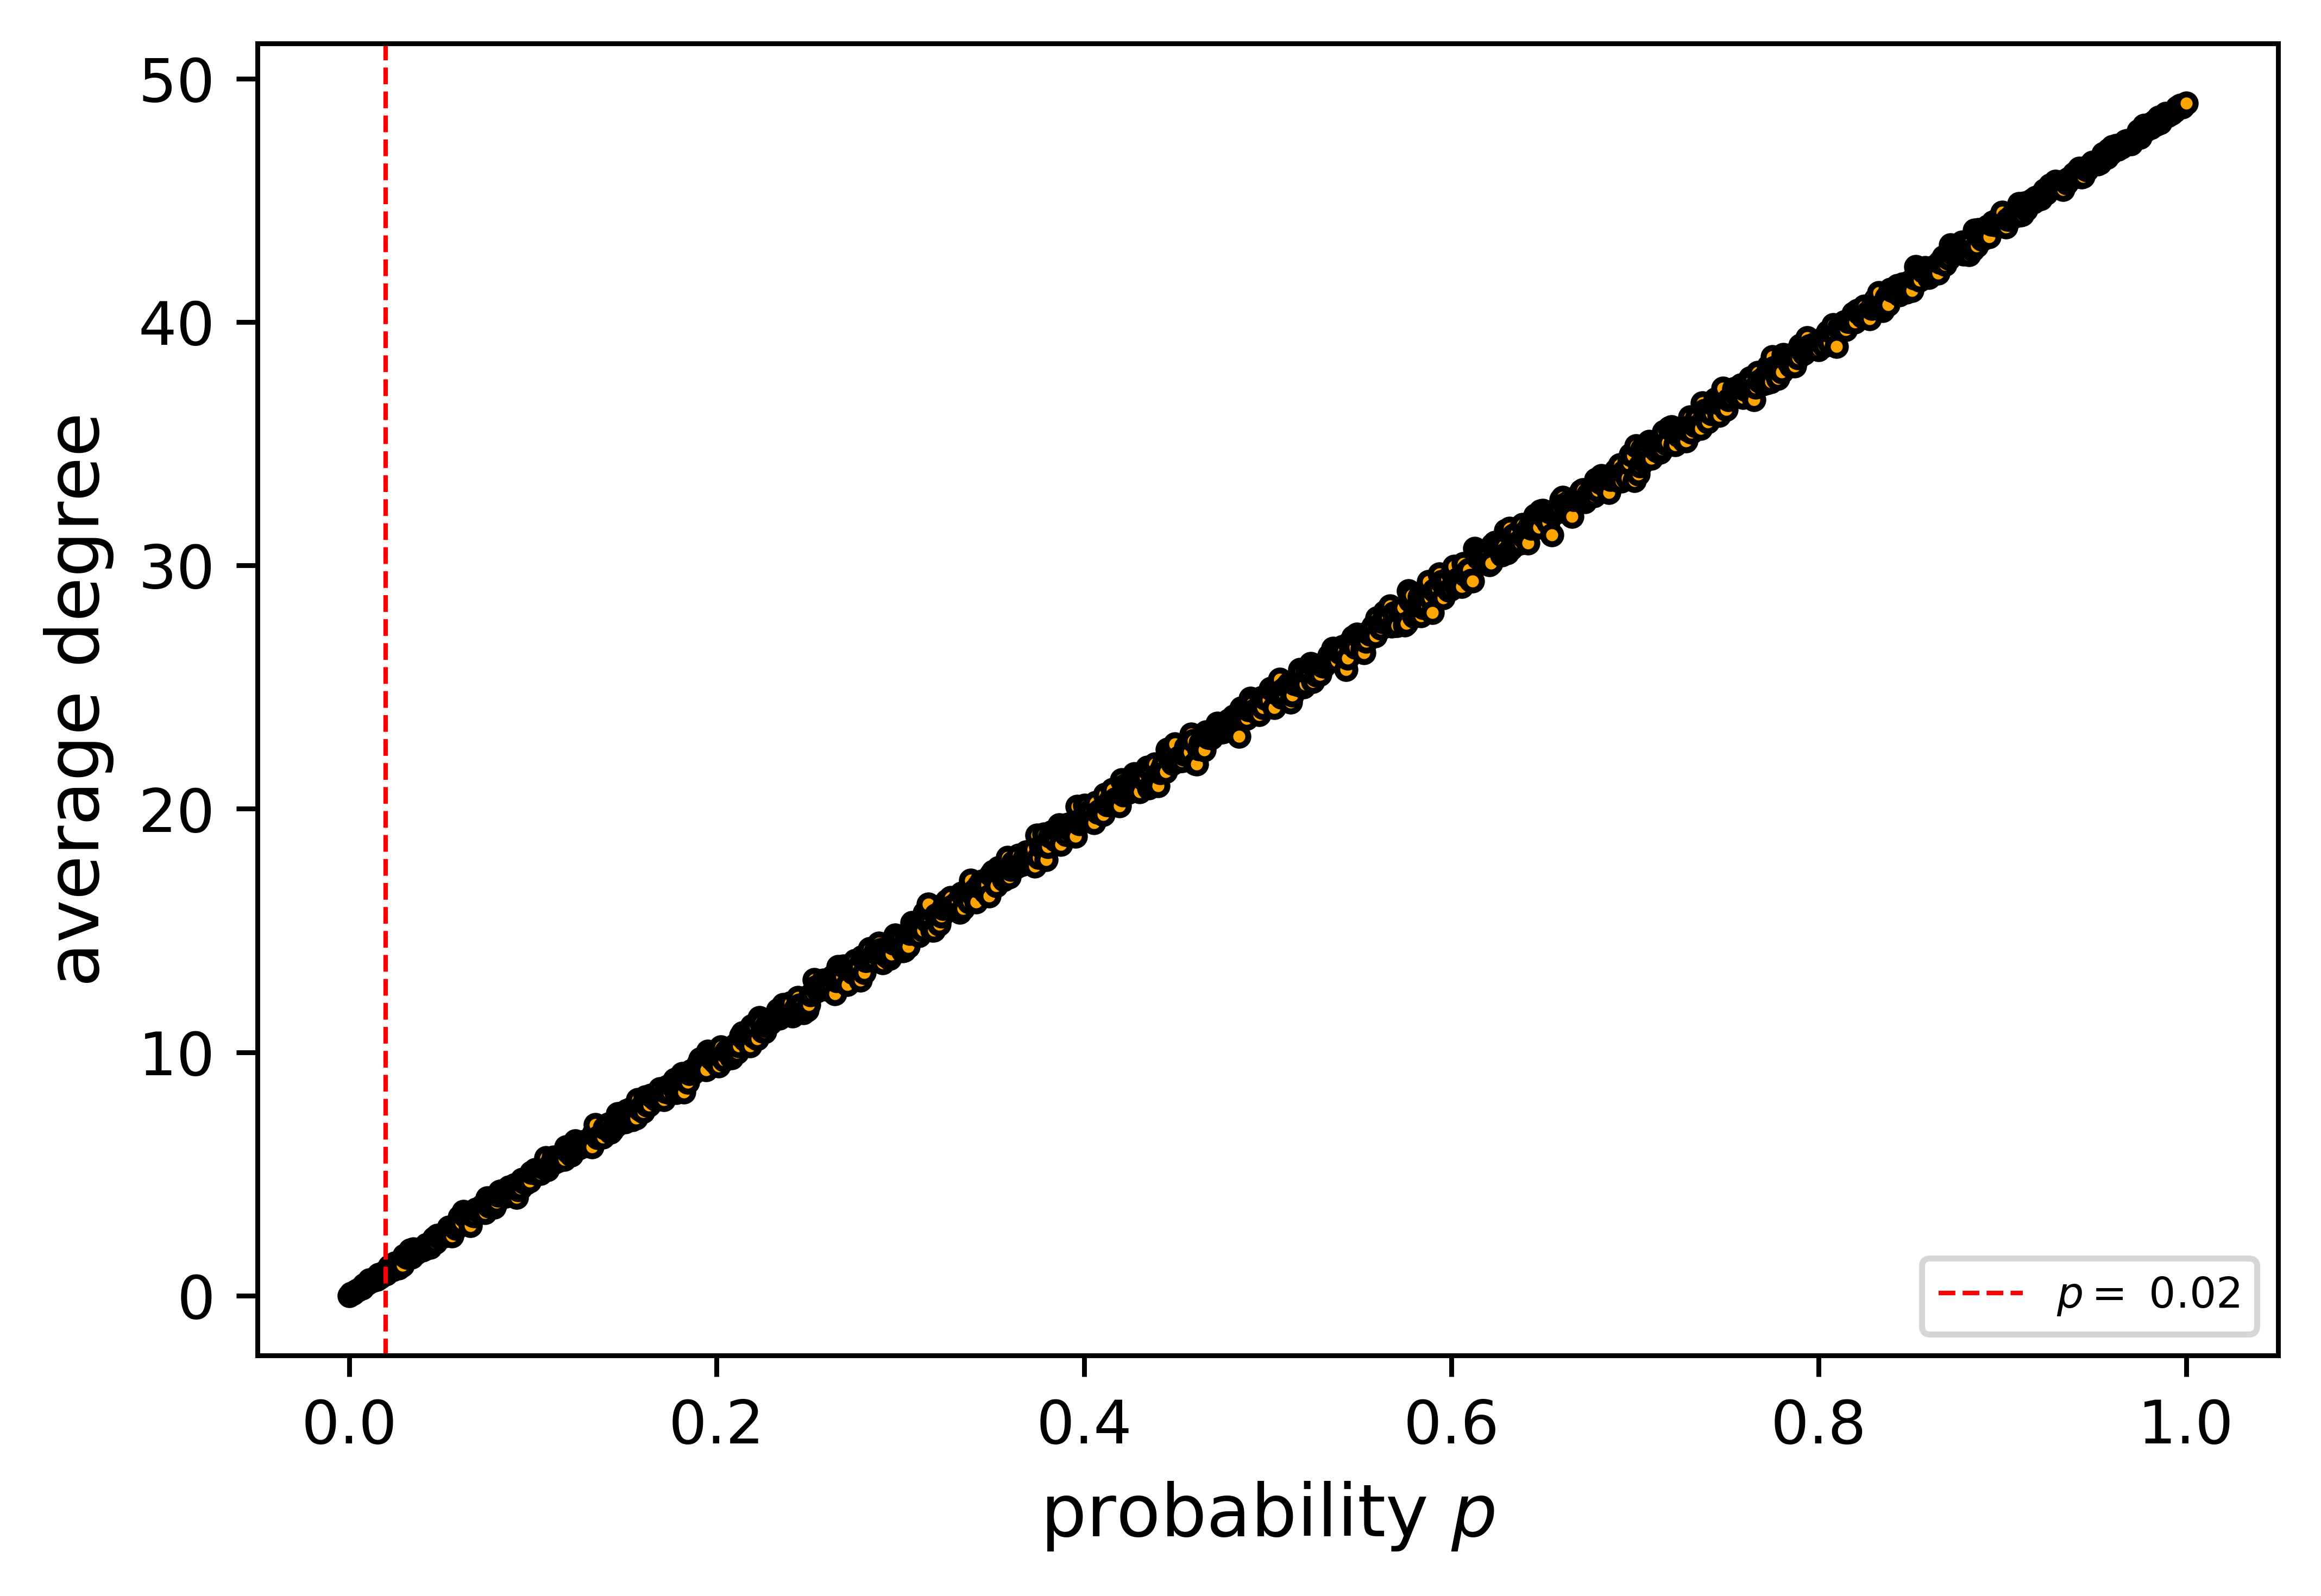

In [ ]:
fig, ax = plt.subplots(dpi=800)

ax.plot(P, degree, linewidth=0.25, marker='o',color='orange',markersize=3,markeredgecolor='k',markeredgewidth=1,fillstyle='full',clip_on=True)
plt.axvline(1/N, linestyle='--',linewidth=0.75,color='r',label='$p=$ {}'.format(1/N))

plt.legend(loc='best',fontsize=7)
plt.xlabel(r'probability $p$',fontsize=12)
plt.ylabel(r'average degree',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('degree.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

## (6) Número componentes conexas vs probability

In [ ]:
P = np.linspace(0,1,1000)
componentes = {p:[] for p in P}
N=50
repeticiones = 5
for r in range(repeticiones):
    for p in P:
        G=nx.erdos_renyi_graph(N,p)
        componentes[p]+=[nx.number_connected_components(G)]

componentes = [np.mean(c) for c in componentes.values()]

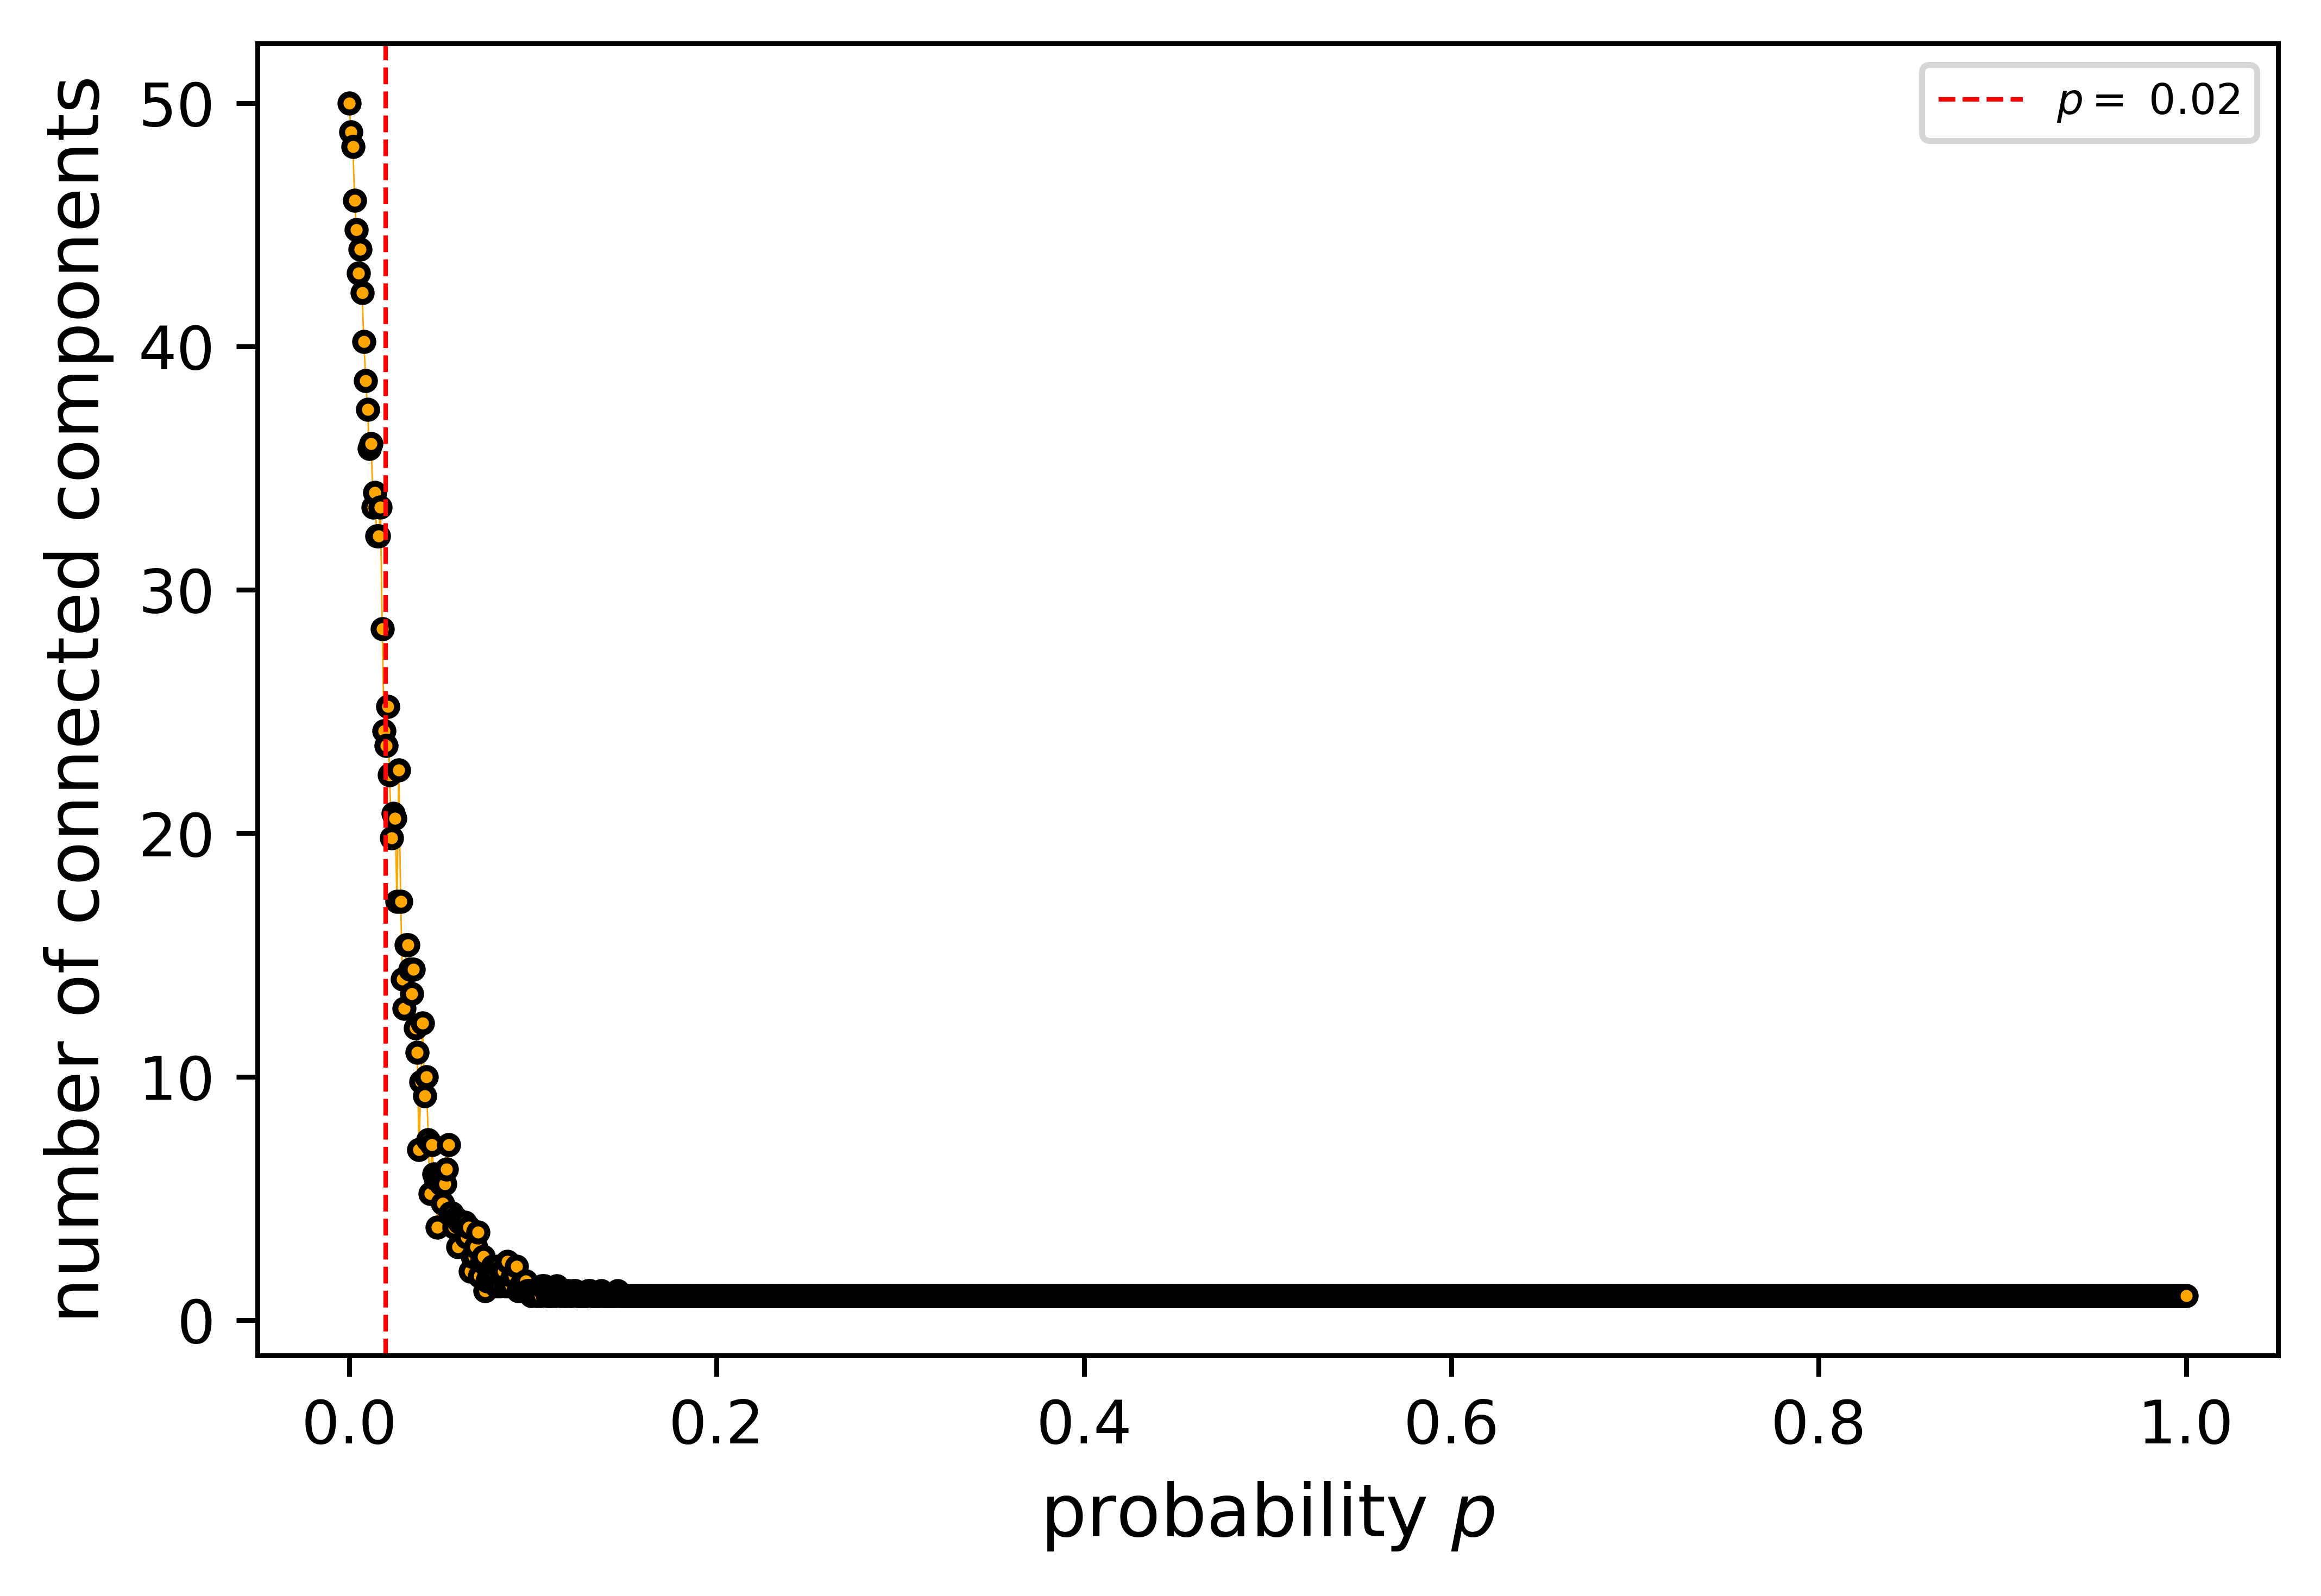

In [ ]:
fig, ax = plt.subplots(dpi=800)

ax.plot(P, componentes, linewidth=0.25, marker='o',color='orange',markersize=3,markeredgecolor='k',markeredgewidth=1,fillstyle='full',clip_on=True)
plt.axvline(1/N, linestyle='--',linewidth=0.75,color='r',label='$p=$ {}'.format(1/N))

plt.legend(loc='best',fontsize=7)
plt.xlabel(r'probability $p$',fontsize=12)
plt.ylabel(r'number of connected components',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('components.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

## (7) ¿Es conexo? vs probability

In [ ]:
P = np.linspace(0,1,1000)
conexo = {p:[] for p in P}
N=50
repeticiones = 5
for r in range(repeticiones):
    for p in P:
        G=nx.erdos_renyi_graph(N,p)
        conexo[p]+=[nx.is_connected(G)]

conexo = [np.mean(c) for c in conexo.values()]

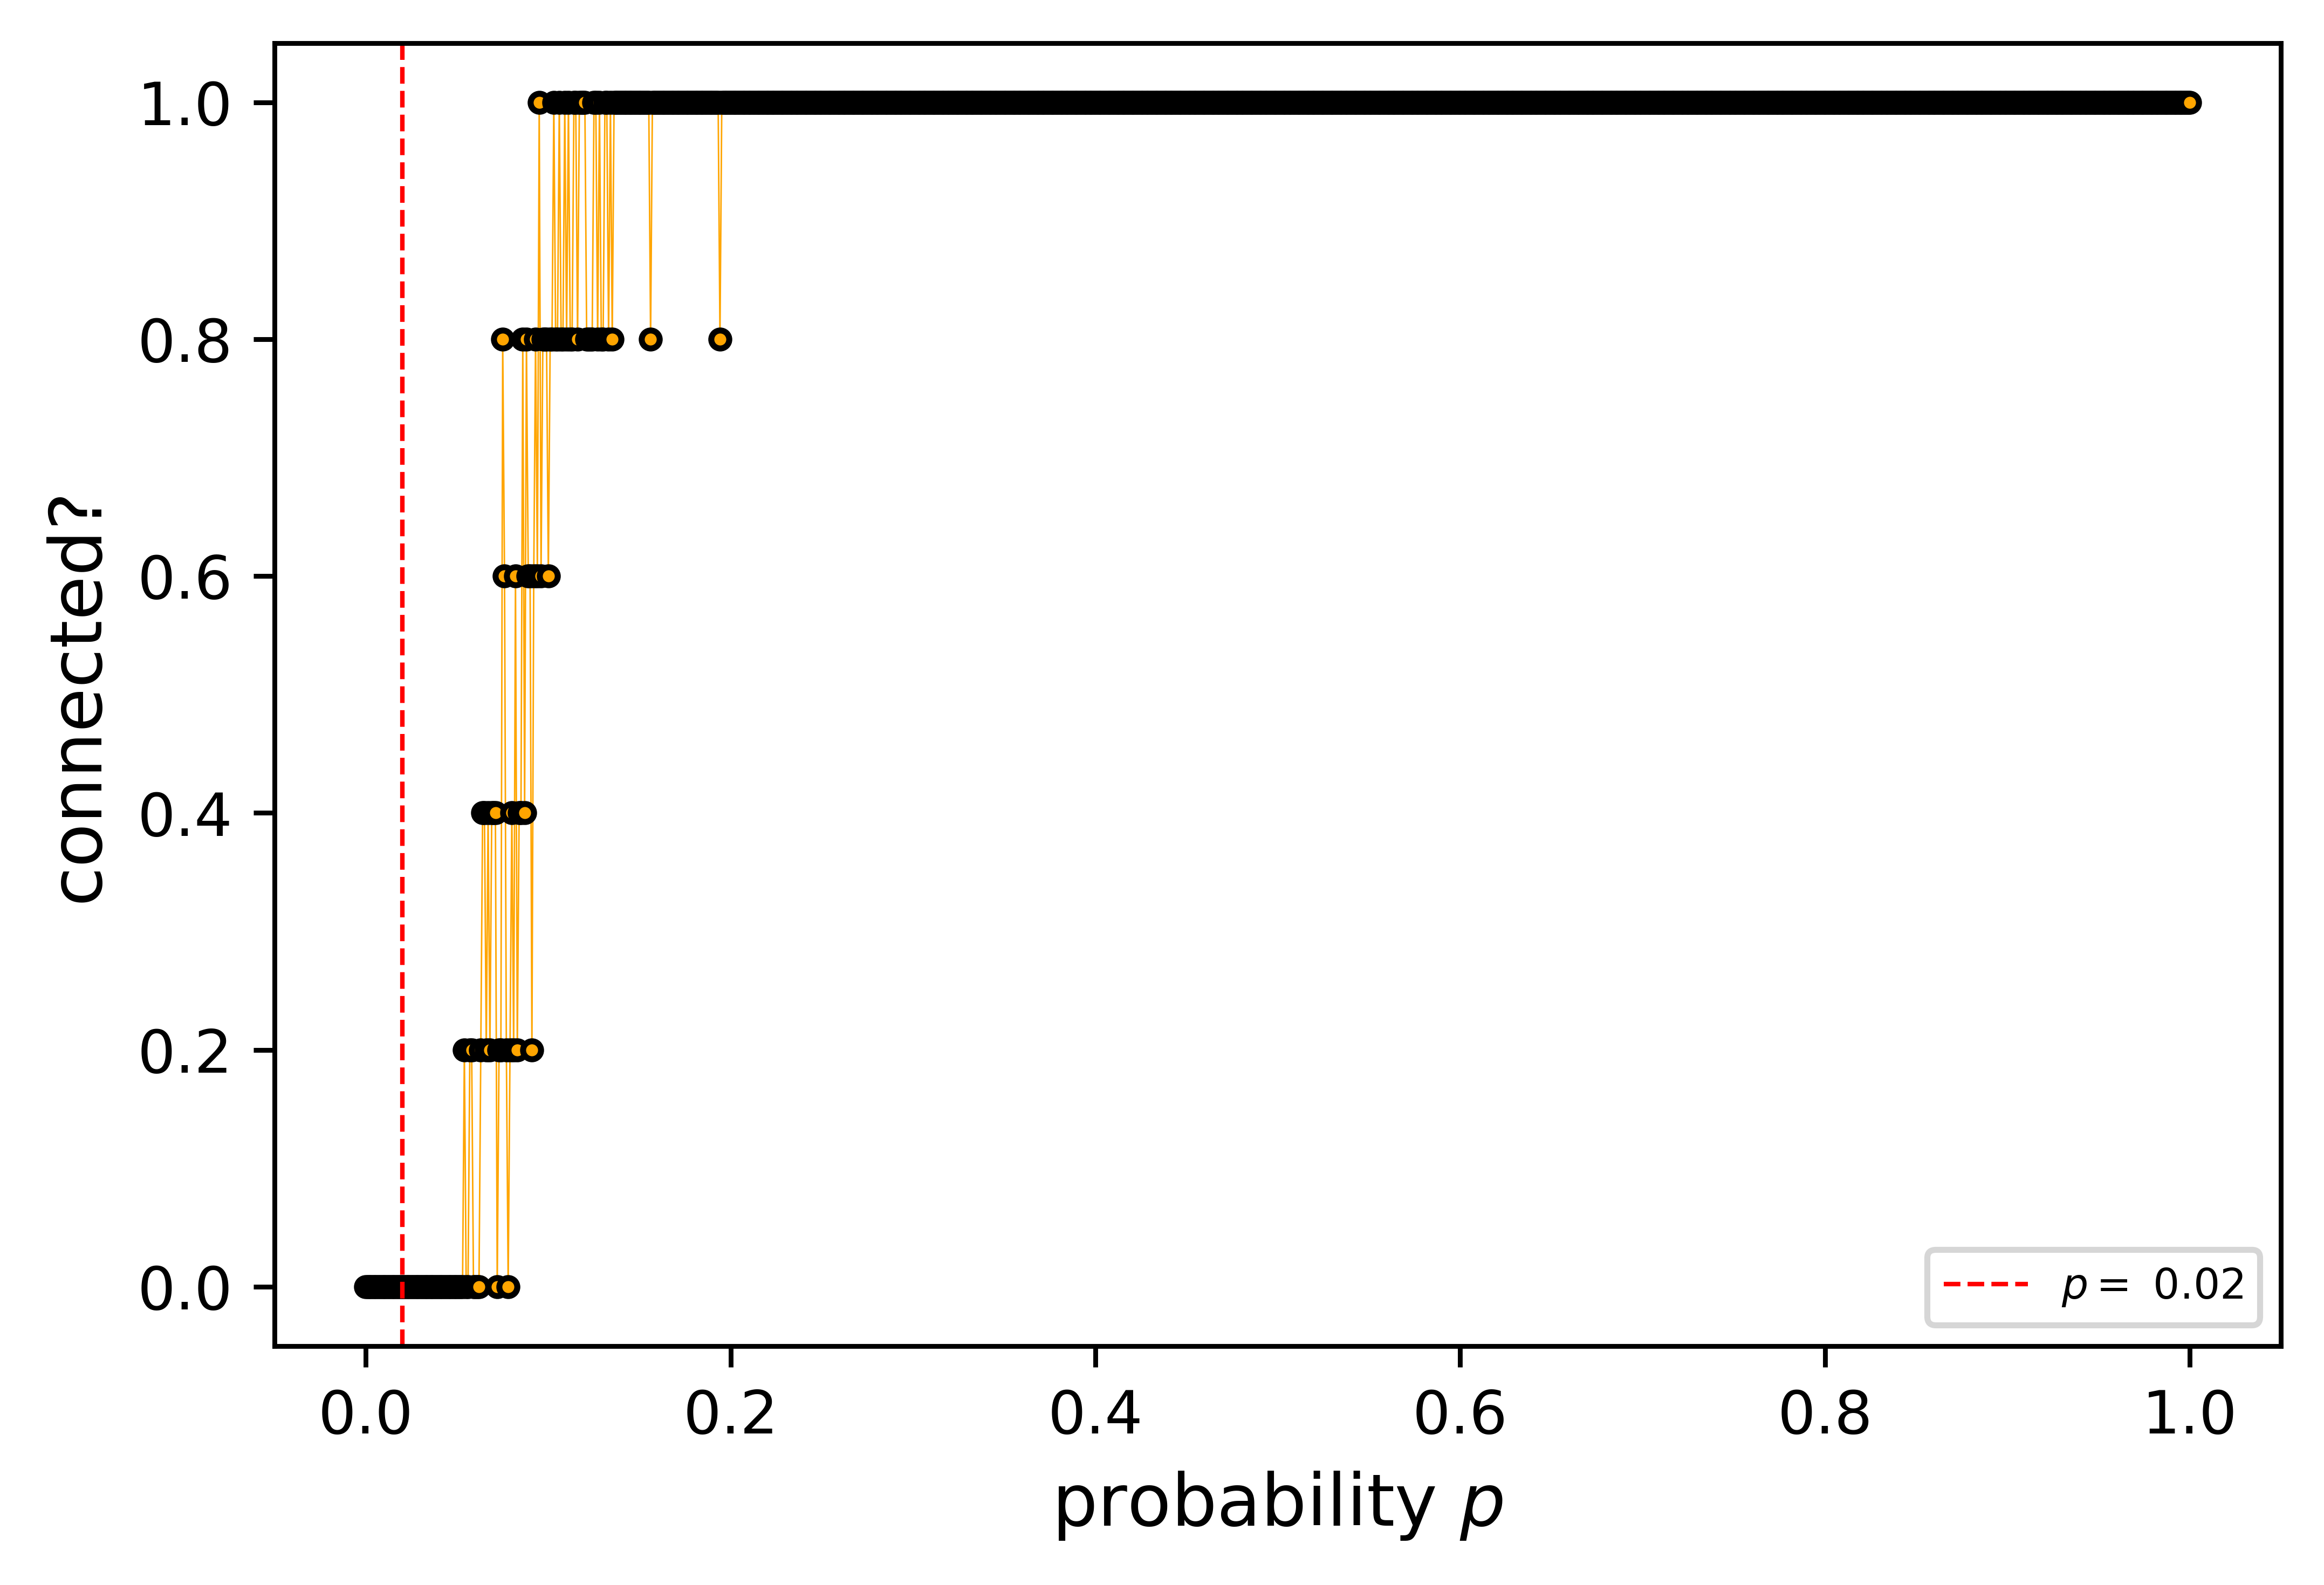

In [ ]:
fig, ax = plt.subplots(dpi=800)

ax.plot(P, conexo, linewidth=0.25, marker='o',color='orange',markersize=3,markeredgecolor='k',markeredgewidth=1,fillstyle='full',clip_on=True)
plt.axvline(1/N, linestyle='--',linewidth=0.75,color='r',label='$p=$ {}'.format(1/N))

plt.legend(loc='best',fontsize=7)
plt.xlabel(r'probability $p$',fontsize=12)
plt.ylabel(r'connected?',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('connected.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

## (8) Grafos aleatorios de referencia

In [ ]:
## un ejemplo conocido

G = nx.karate_club_graph()

In [ ]:
plotG(G)

In [ ]:
Gr = nx.random_reference(G)

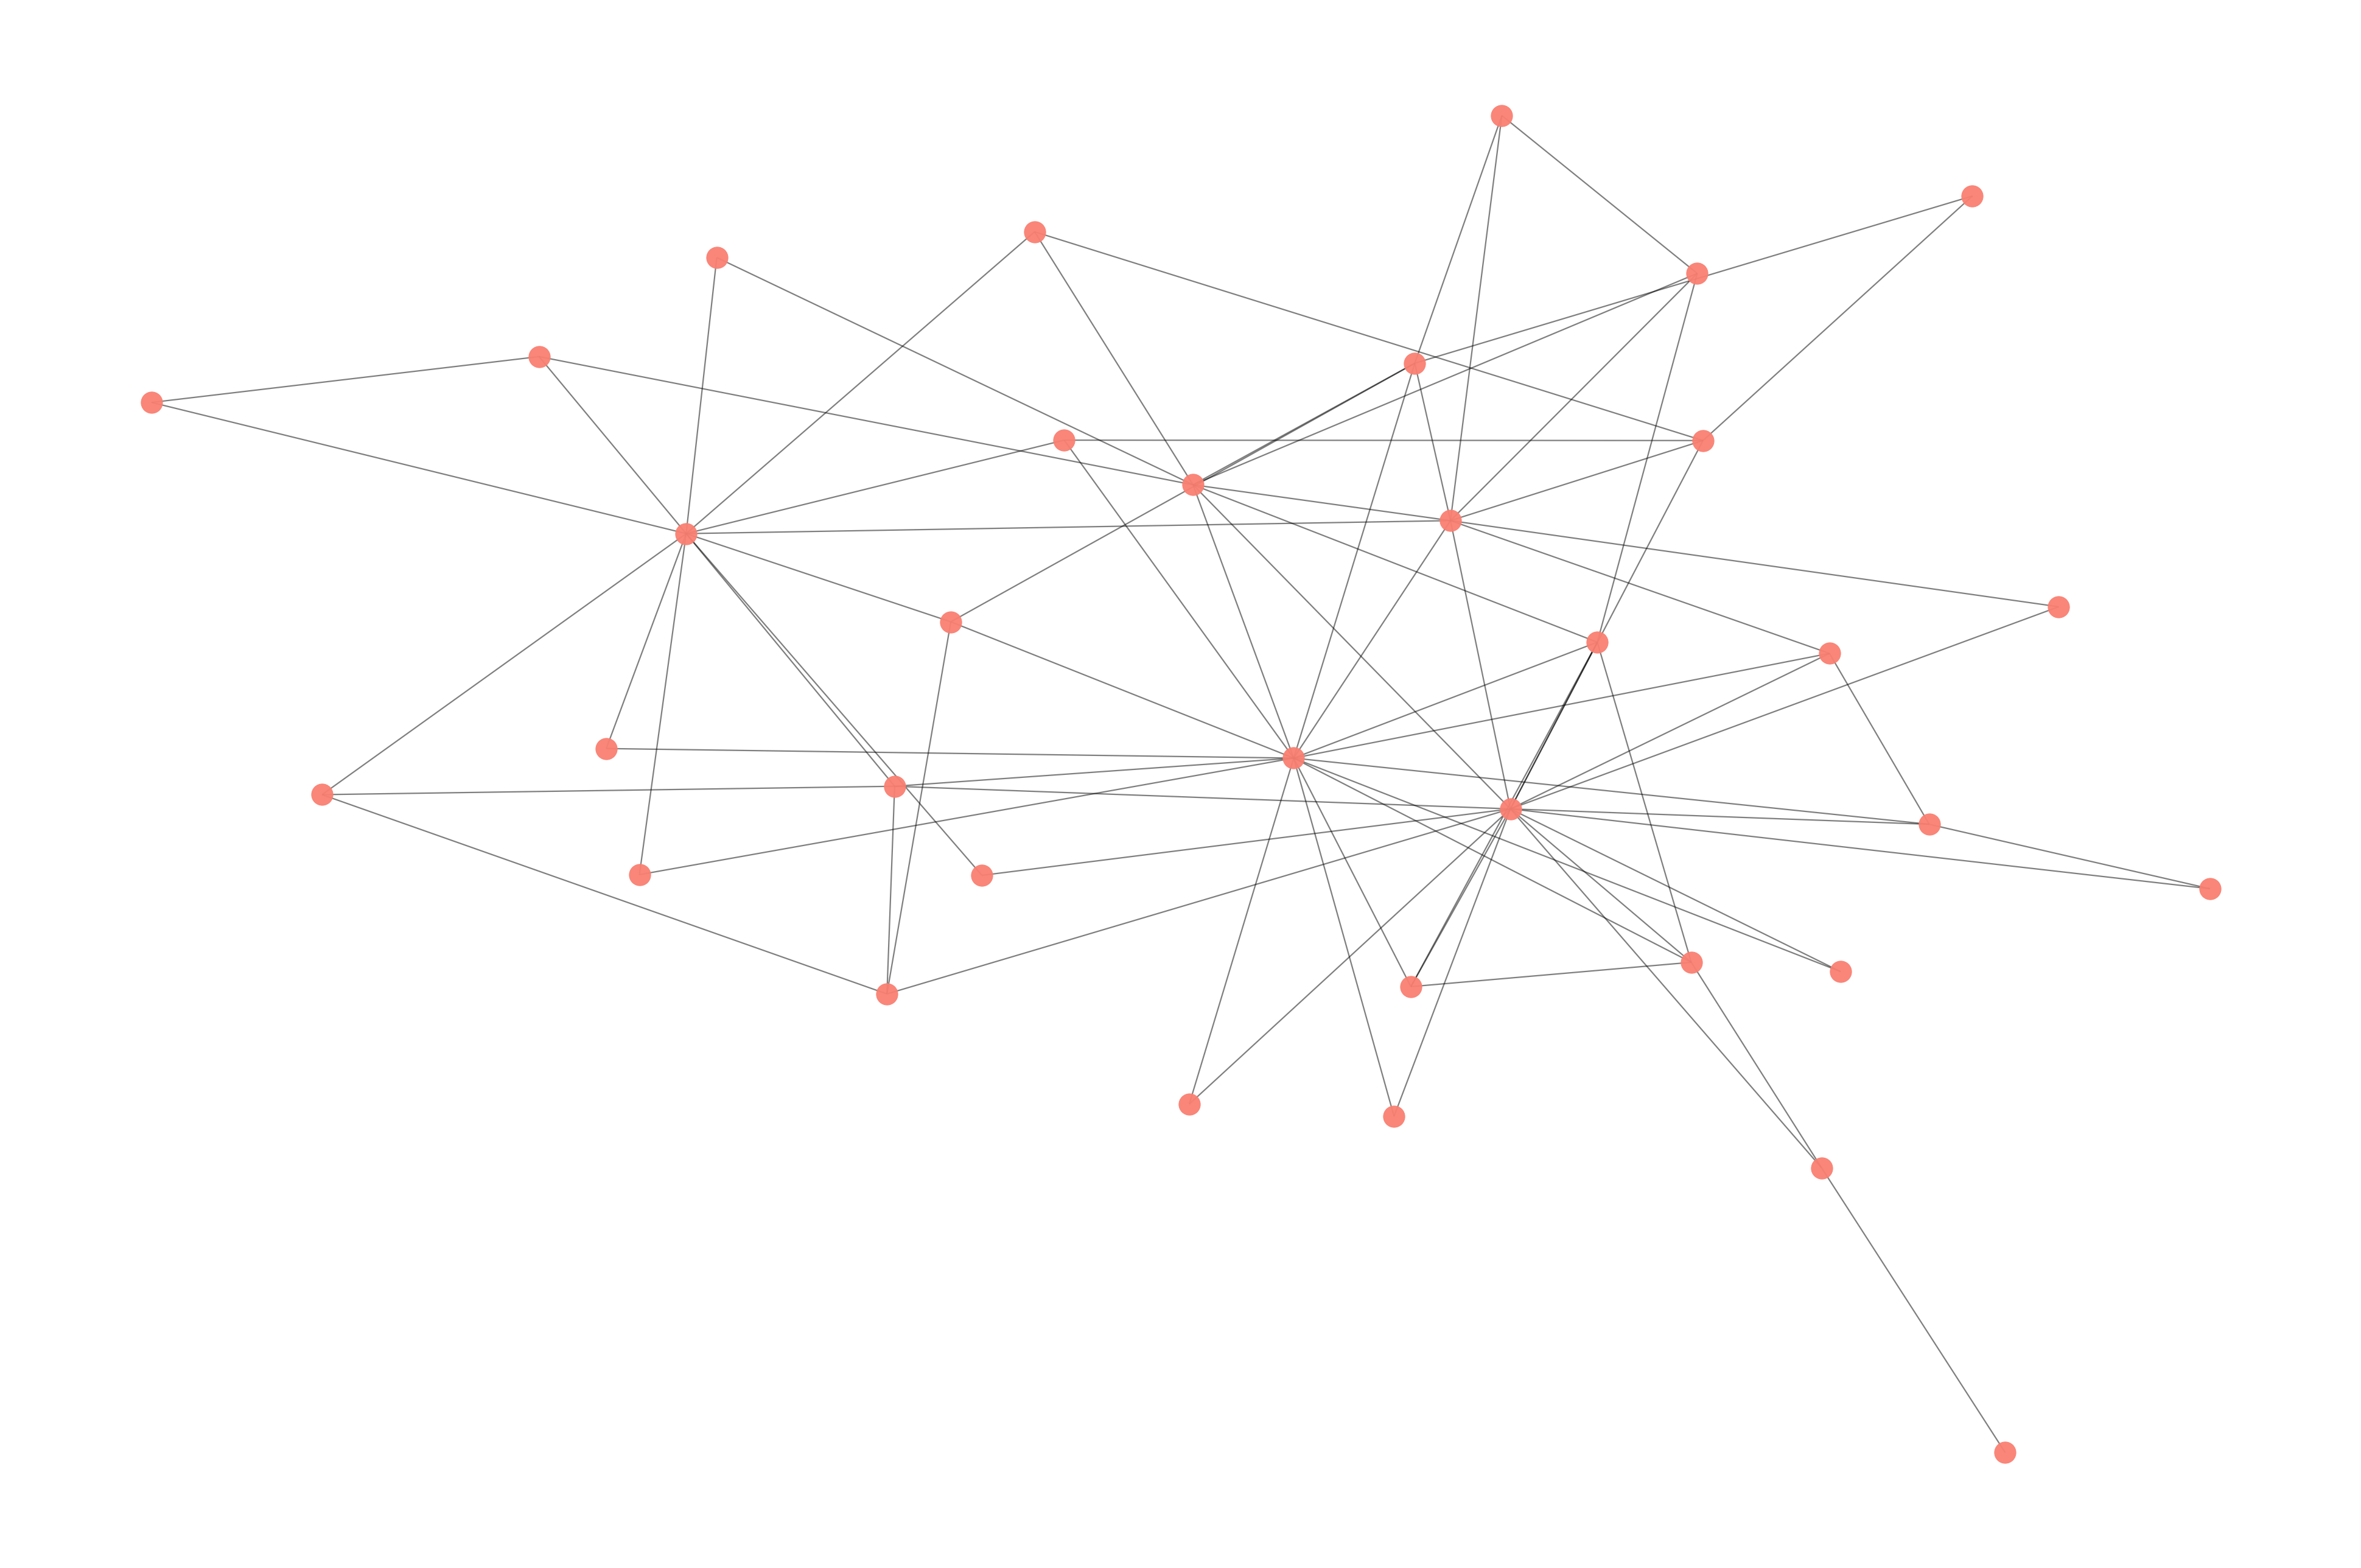

In [ ]:
plotG(Gr)

In [ ]:
grafos_aleatorios = []
number_graphs=1000

for i in range(number_graphs):
    grafos_aleatorios.append(nx.random_reference(G))

#### average shortest path G vs G random reference!

In [ ]:
caminos = []
for g in grafos_aleatorios:
    caminos.append(nx.average_shortest_path_length(g))

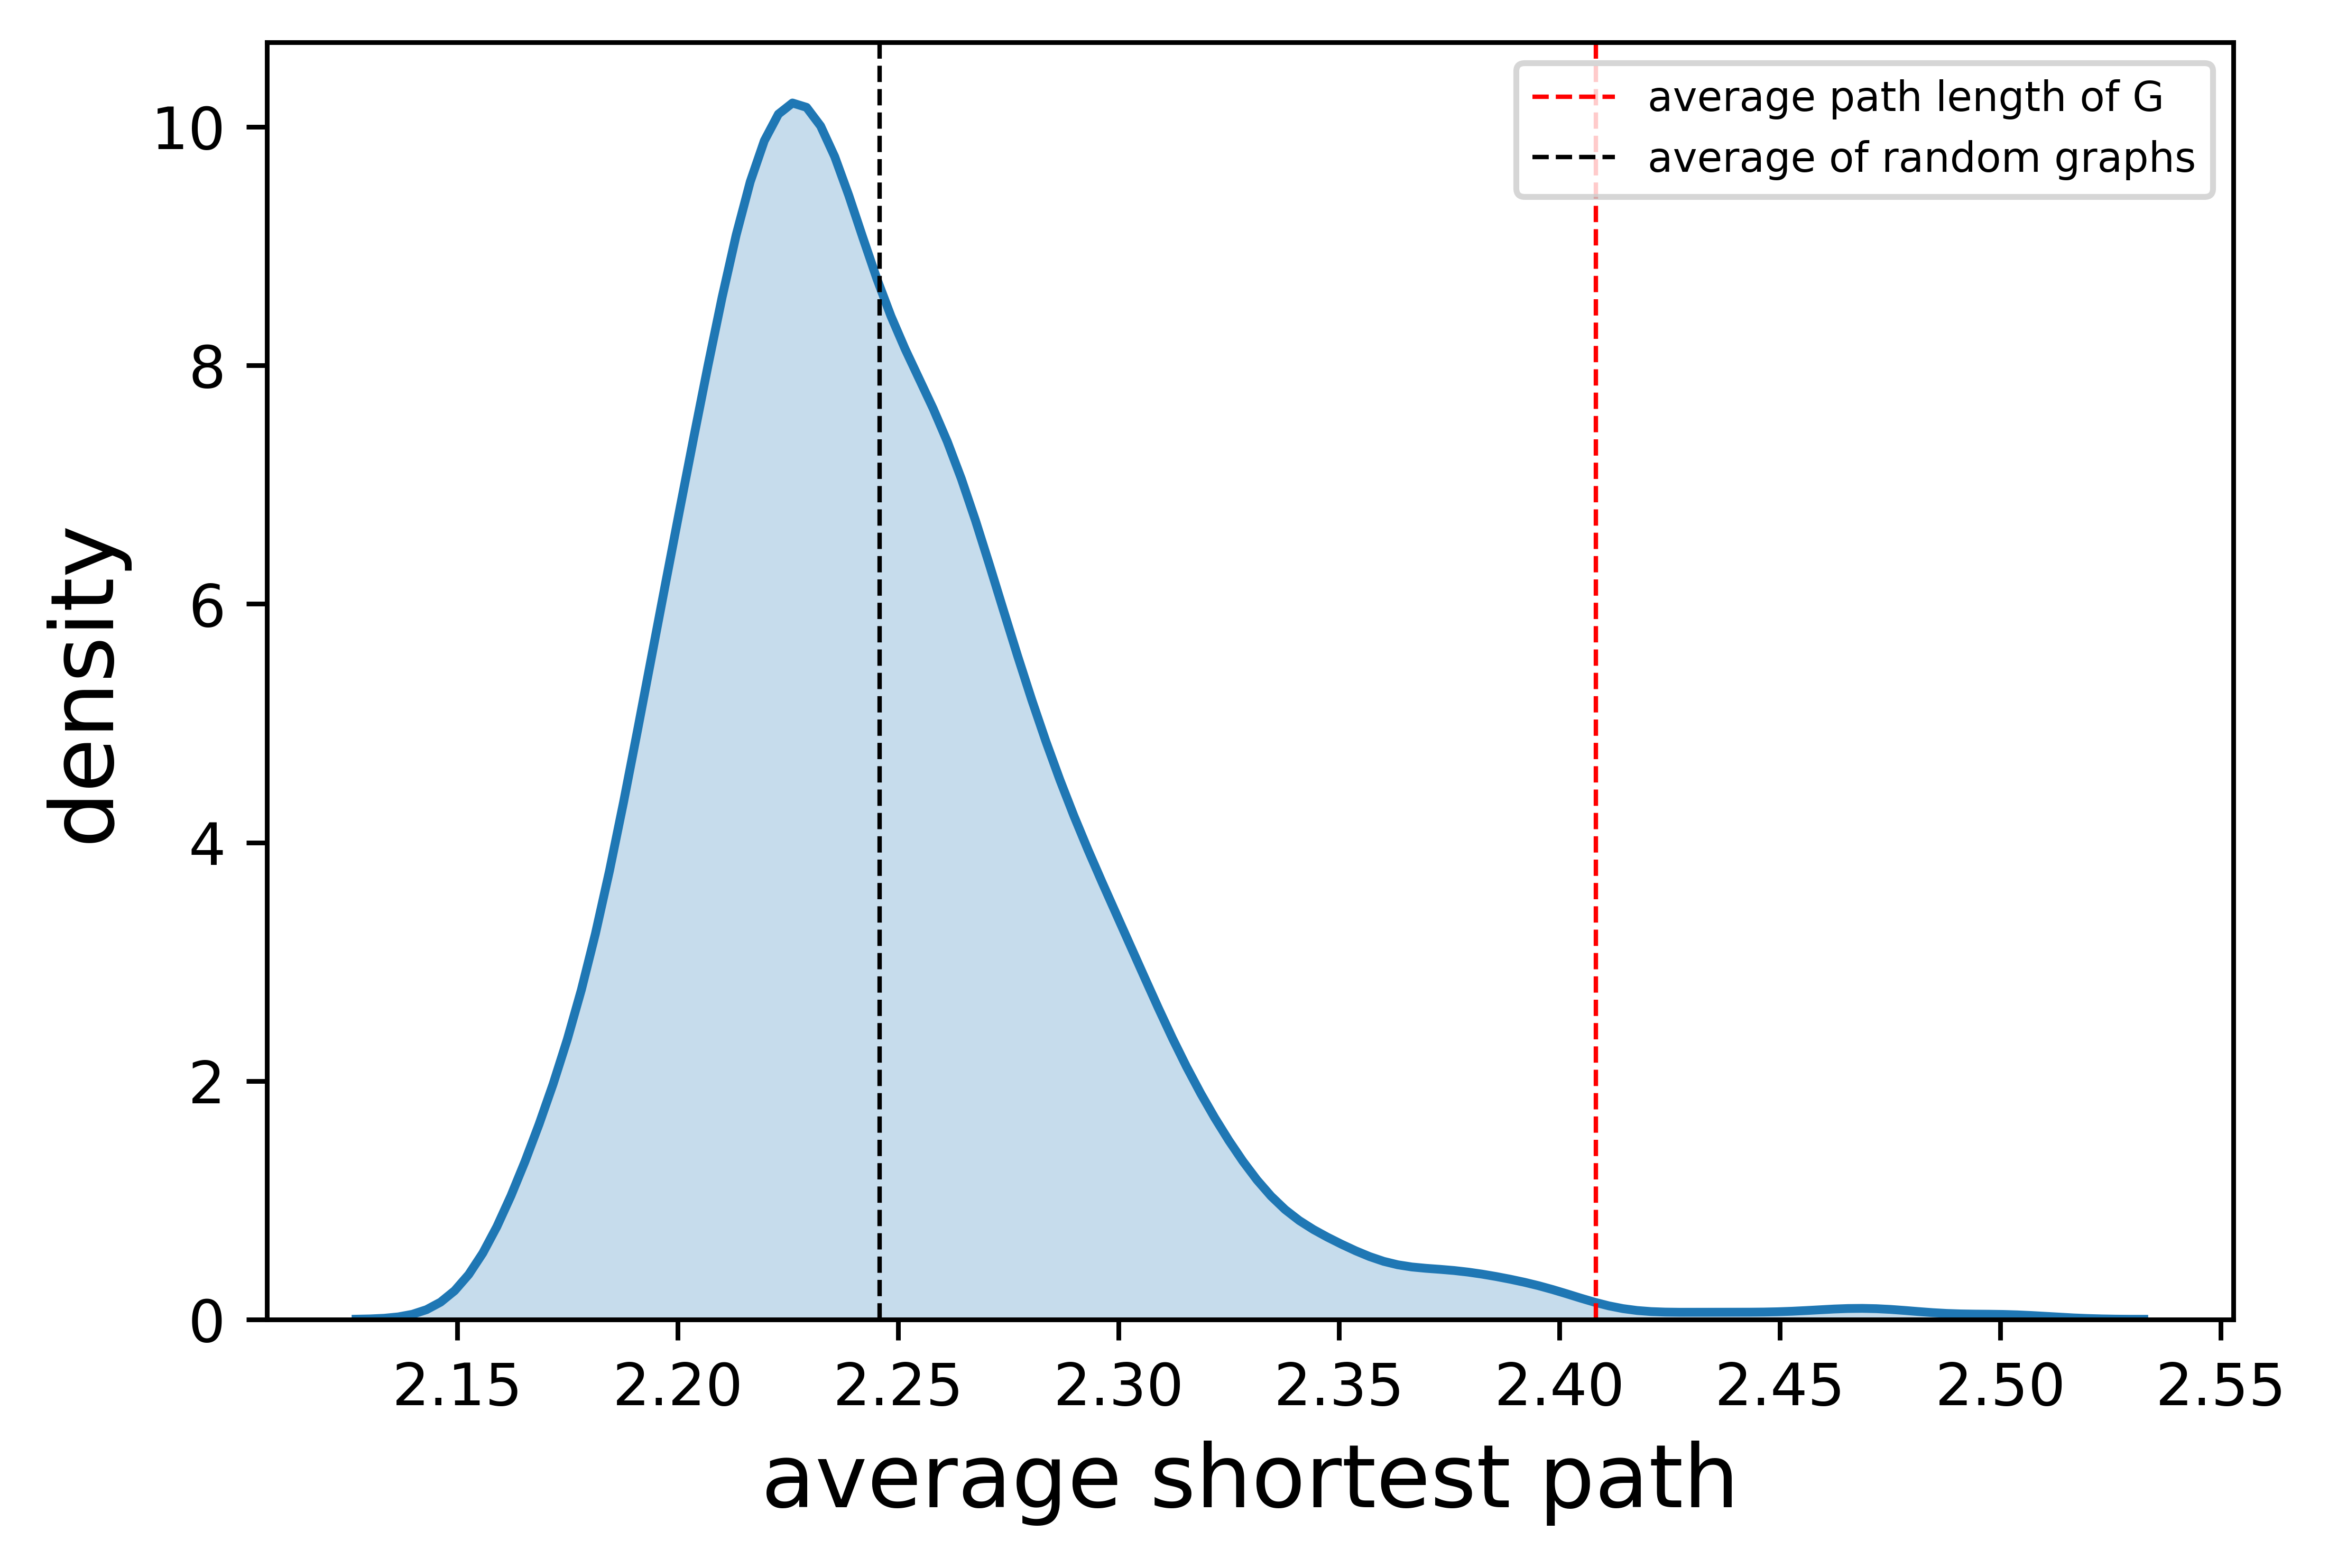

In [ ]:
fig, ax = plt.subplots(dpi=800)

sns.kdeplot(caminos,shade=True)
plt.axvline(nx.average_shortest_path_length(G), linestyle='--',linewidth=0.75,color='r',label='average path length of G')
plt.axvline(np.mean(caminos), linestyle='--',linewidth=0.75,color='k',label='average of random graphs')

plt.legend(loc='best',fontsize=7)
plt.ylabel(r'density',fontsize=15)
plt.xlabel(r'average shortest path',fontsize=15)
plt.show()

#### average clustering G vs G random reference!

In [ ]:
clustering = []
for g in grafos_aleatorios:
    clustering.append(nx.average_clustering(g))

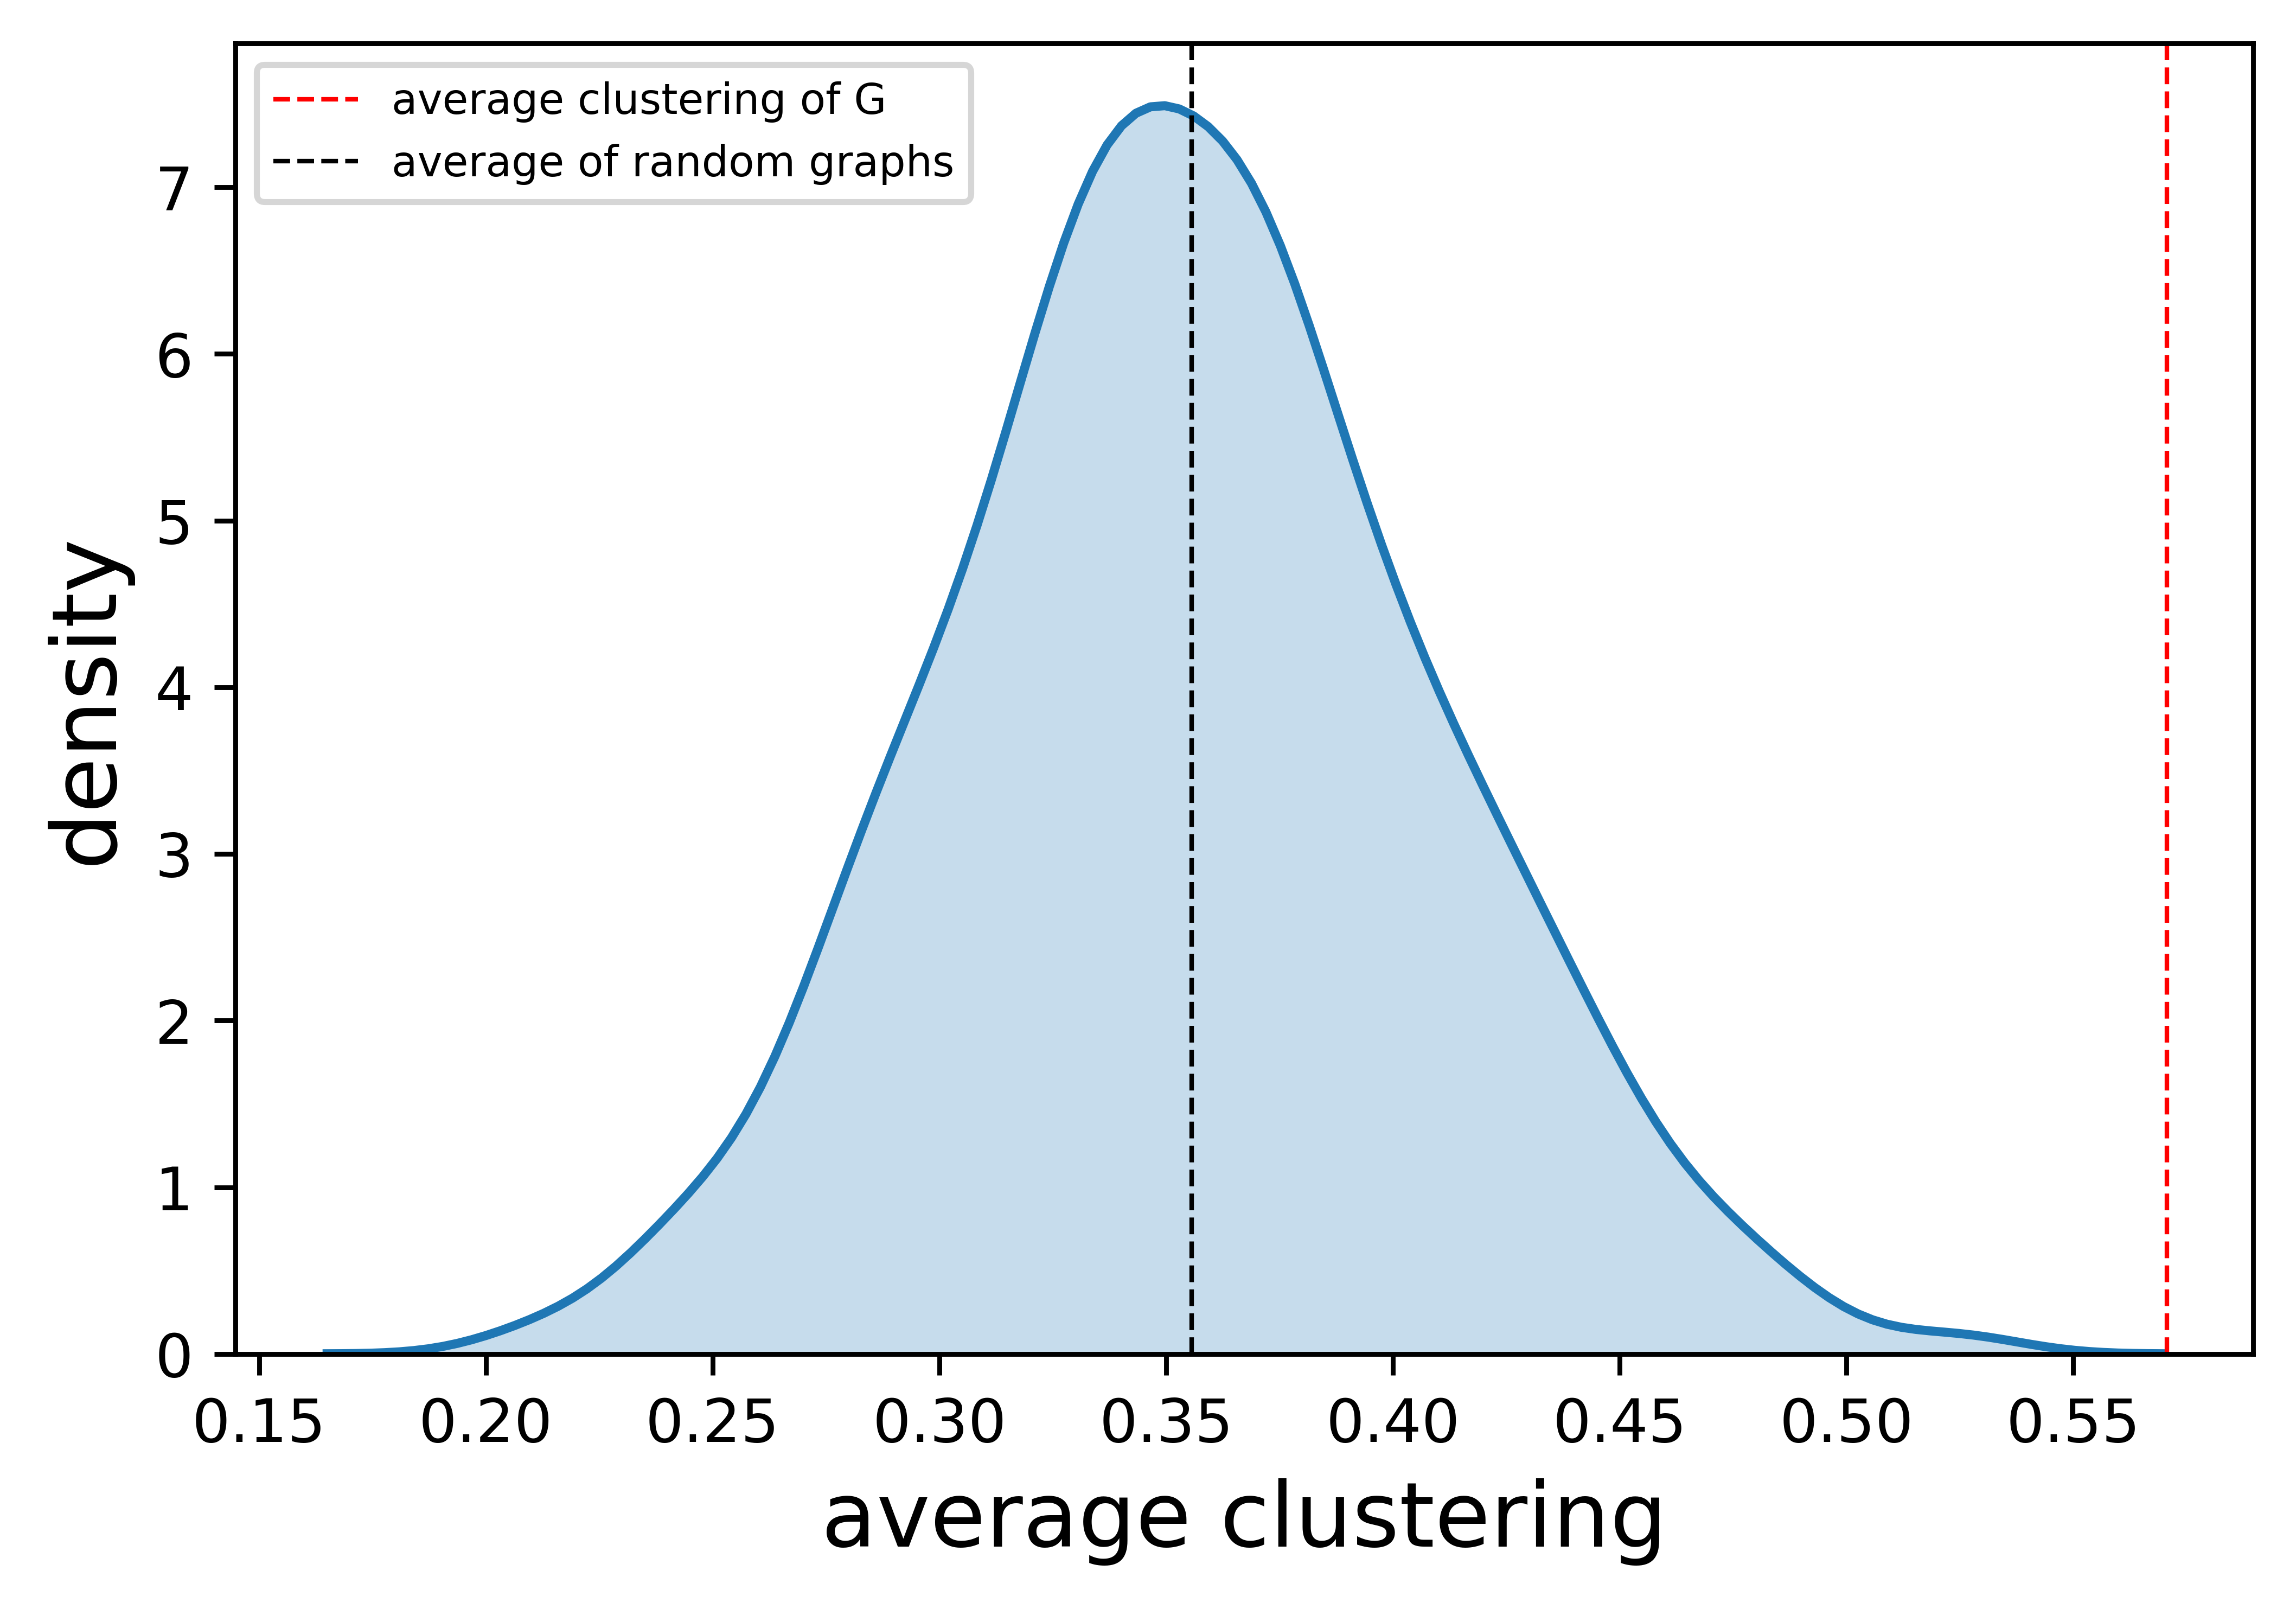

In [ ]:
fig, ax = plt.subplots(dpi=800)

sns.kdeplot(clustering,shade=True)
plt.axvline(nx.average_clustering(G), linestyle='--',linewidth=0.75,color='r',label='average clustering of G')
plt.axvline(np.mean(clustering), linestyle='--',linewidth=0.75,color='k',label='average of random graphs')

plt.legend(loc='best',fontsize=7)
plt.ylabel(r'density',fontsize=15)
plt.xlabel(r'average clustering',fontsize=15)
plt.show()